In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from datetime import date

In [3]:
df=pd.read_csv('companies.csv')

In [27]:
df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [5]:
df=df[(pd.notnull(df['first_funding_at']))&(pd.notnull(df['founded_at']))]

In [6]:
df['founded_at']=df['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['first_funding_at']=df['first_funding_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [7]:
df['founded_at_date']=df['founded_at'].apply(lambda x:x.date())
df['first_funding_at_date']=df['first_funding_at'].apply(lambda x:x.date())

In [8]:
df['difference']=df['first_funding_at_date']-df['founded_at_date']

In [9]:
df['difference']=df['difference'].apply(lambda x:x.days/30)

In [10]:
df=df[pd.notnull(df['status'])]

In [11]:
df=df[(df['country_code']=='USA')&(df['status']=='operating')]

In [12]:
df['difference'].median()

18.5

In [13]:
#df['founding_year']=df['founded_at'].apply(lambda x:x.year)

In [14]:
df['founded_at']=df['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['founding_year']=df['founded_at'].apply(lambda x:x.year)
df['founding_month']=df['founded_at'].apply(lambda x:x.month)
df['founding_day']=df['founded_at'].apply(lambda x:x.day)

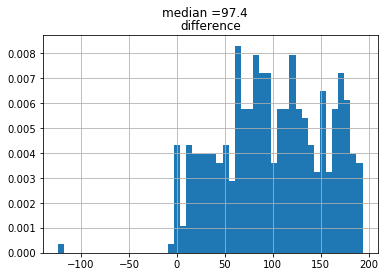

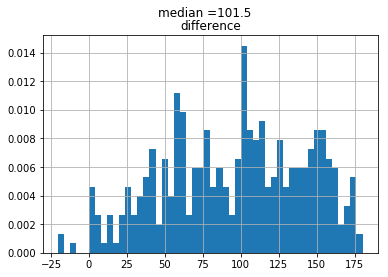

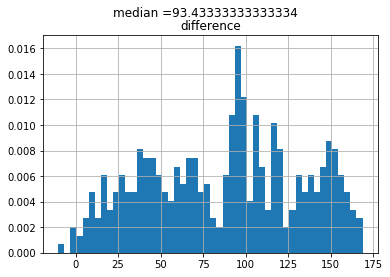

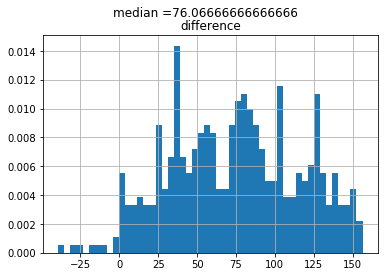

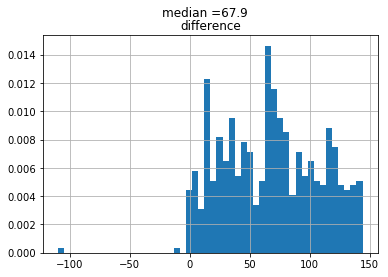

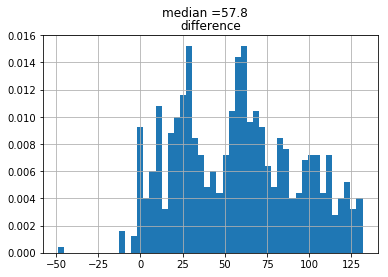

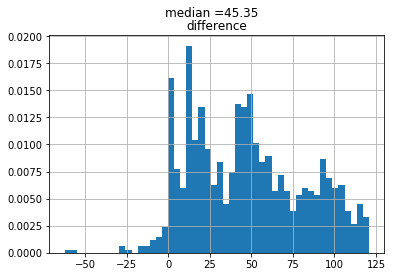

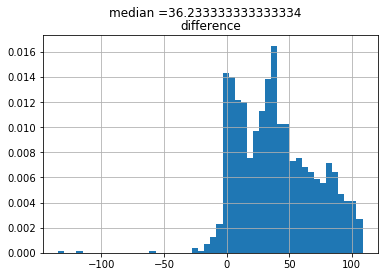

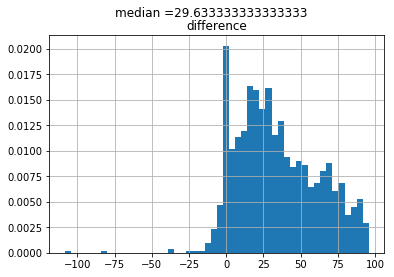

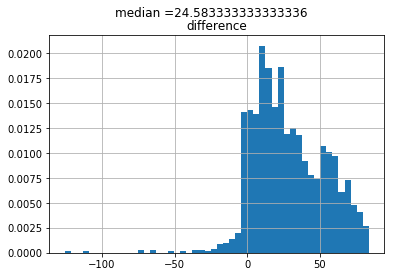

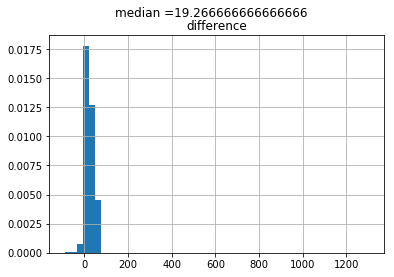

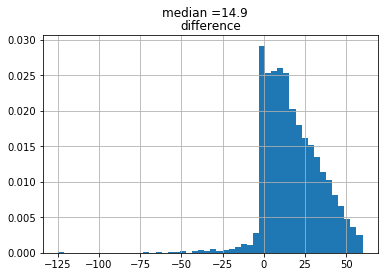

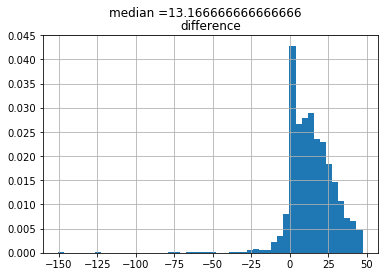

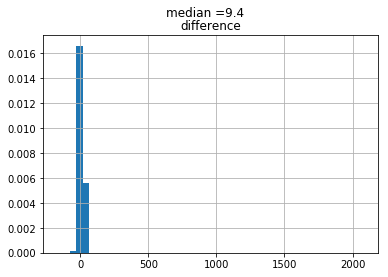

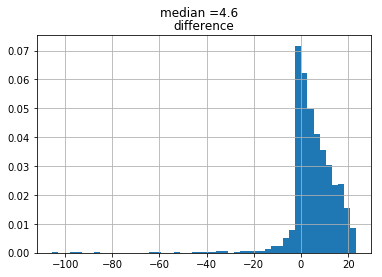

In [84]:
#average time for first funding for successful startups in USA
import pylab as pl
for year in range(2000,2015):
    df_year=df[df['founding_year']==year]
    df_year.hist(column='difference',bins=50,normed=1)
    pl.suptitle('median ='+str(df_year['difference'].median()))


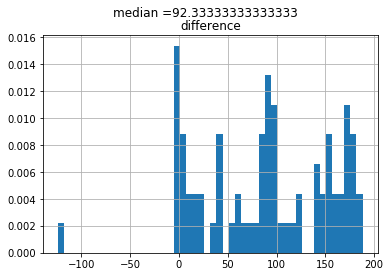

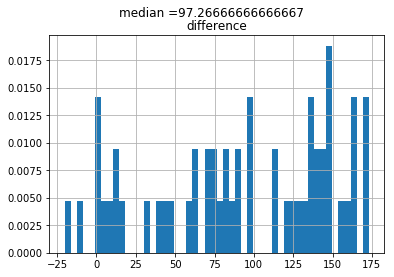

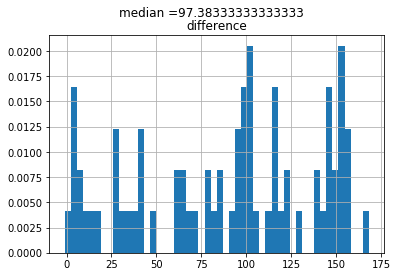

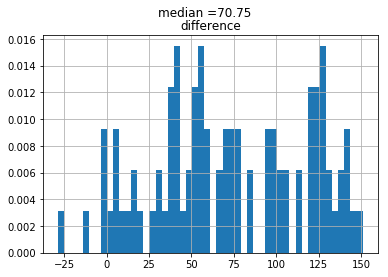

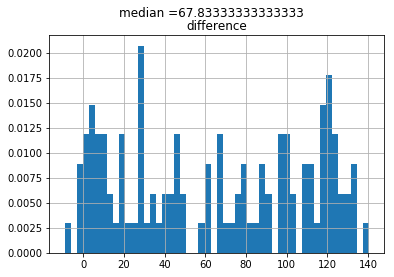

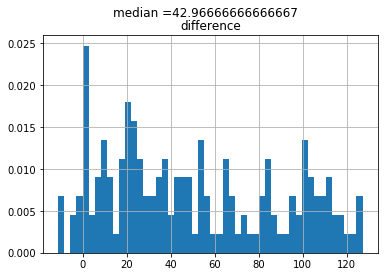

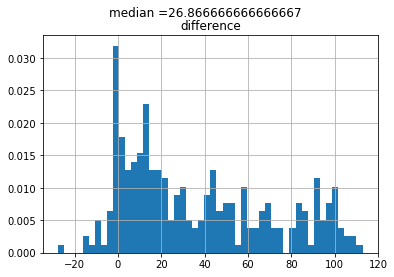

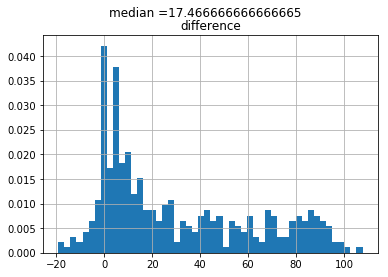

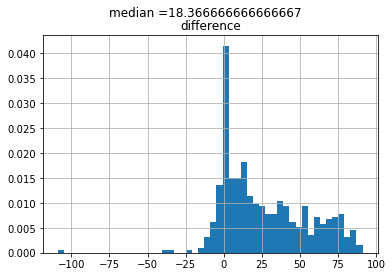

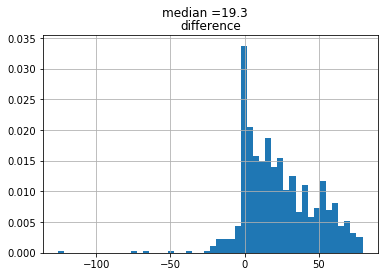

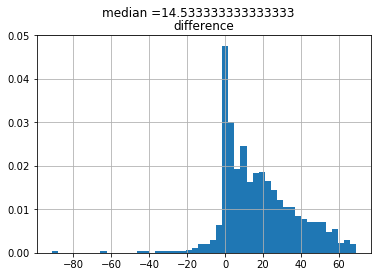

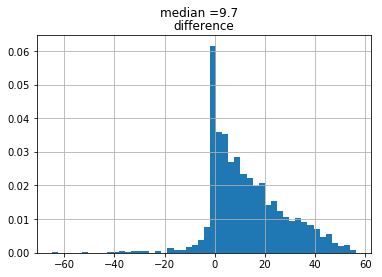

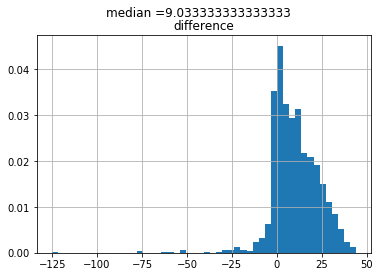

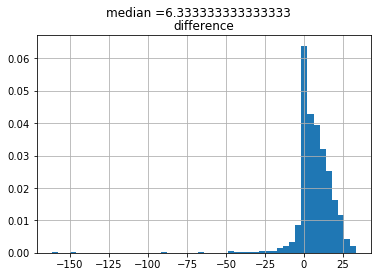

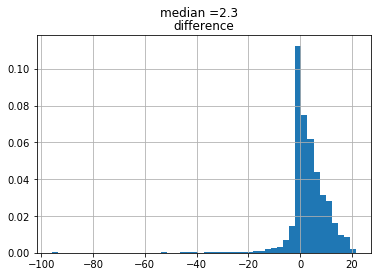

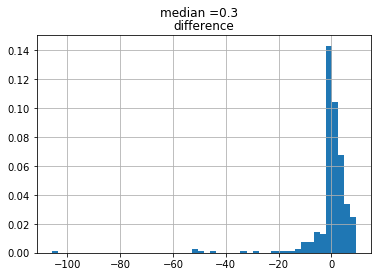

In [87]:
#average time for first funding for successful startups in USA after cleaning up jan 1st
import pylab as pl
for year in range(2000,2016):
    df_year=df[(df['founding_year']==year) & ~((df['founding_month']==1) & (df['founding_day']==1))]
    df_year.hist(column='difference',bins=50,normed=1)
    pl.suptitle('median ='+str(df_year['difference'].median()))

In [ ]:
# funding vs success

In [15]:
df=pd.read_csv('companies.csv')
df=df[(pd.notnull(df['status']))&(pd.notnull(df['founded_at']))&(pd.notnull(df['funding_total_usd']))&(pd.notnull(df['funding_rounds']))&(pd.notnull(df['country_code']))&(~(df['funding_total_usd']=='-'))]
df=df[(pd.notnull(df['first_funding_at']))&(pd.notnull(df['founded_at']))]
df['founded_at']=df['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['founding_year']=df['founded_at'].apply(lambda x:x.year)
df['founding_month']=df['founded_at'].apply(lambda x:x.month)
df['founding_day']=df['founded_at'].apply(lambda x:x.day)

In [16]:
df['funding_total_usd']=df['funding_total_usd'].apply(lambda x:float(x))

In [17]:
clist=df['country_code'].unique()

In [18]:
country_funding=[]
for country in clist:
    country_funding.append(df[(df['country_code']==country)&(df['status']=='operating')]['funding_total_usd'].mean())


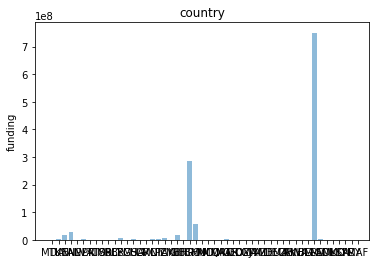

In [36]:
plt.bar(list(range(len(clist)))[-50:], country_funding[-50:], align='center', alpha=0.5)
plt.xticks(list(range(len(clist)))[-50:], clist[-50:])
plt.ylabel('funding')
plt.title('country')
 
plt.show()

In [62]:
for year in range(2000,2016):
    df_s=df[(~(df['status']=='closed'))&(df['founding_year']==year)&(df['country_code']=='USA')]
    df_f=df[(df['status']=='closed')&(df['founding_year']==year)&(df['country_code']=='USA')]
#     tup=df_s['funding_total_usd'].mean()>df_f['funding_total_usd'].mean(),df_s['funding_total_usd'].sum()>df_f['funding_total_usd'].sum()
#     print(tup)
    print(df_s['funding_total_usd'].mean())
    print(df_f['funding_total_usd'].mean())
    print('************************')

33047757.538961038
28485170.48780488
************************
39774814.940482
24120303.03030303
************************
38706466.94216418
16735206.576923076
************************
45526883.15521889
20526820.21153846
************************
45394814.87641166
17491621.13043478
************************
30887948.518343195
34943376.65591398
************************
29343488.728489485
11985599.635658914
************************
32068462.711421795
9466507.00617284
************************
23331223.57834033
9005650.751552794
************************
23039048.78345499
4209089.094936709
************************
13176288.861228395
2114592.5175879397
************************
11502992.166652171
2511381.4822335024
************************
8447571.19208257
1557915.9719626168
************************
6922104.587637884
5805971.644067797
************************
3477021.333090954
1400224.7142857143
************************
3069482.4064949956
561579.268292683
************************


In [56]:
tup=df_s['funding_total_usd'].mean()>df_f['funding_total_usd'].mean(),df_s['funding_total_usd'].sum()>df_f['funding_total_usd'].sum()

False

In [ ]:
# see the same thing for diff categories


### from datetime import date
f_date = date(2015, 5, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)


In [22]:
f_date

datetime.date(2015, 5, 2)

In [4]:
df=df[~pd.isnull(df['company_category_list'])]

In [5]:
cat=[x.split('|') for x in df['company_category_list'].unique()]

In [6]:
import itertools
cat=list(set(itertools.chain.from_iterable(cat)))

In [7]:
cat

['Creative',
 'Collectibles',
 'Ventures for Good',
 'Outsourcing',
 'Security',
 'New Technologies',
 'Enterprise Software',
 'Knowledge Management',
 'Privacy',
 'Medical',
 'Sailing Community',
 'Search',
 'Skill Assessment',
 'Custom Retail',
 'FreetoPlay Gaming',
 'Entertainment',
 'Video on Demand',
 'Task Management',
 'Electronics',
 'SexTech',
 'Proximity Internet',
 'Web Browsers',
 'TV Production',
 'Health Diagnostics',
 'Gift Registries',
 'Broadcasting',
 'Elder Care',
 'Motors',
 'Rapidly Expanding',
 'Baby Accessories',
 'Comics',
 'Architecture',
 'Shoes',
 'Email Newsletters',
 'File Sharing',
 'Automated Kiosk',
 'Audio',
 '3D',
 'Gold',
 'Apps',
 'Clean Technology IT',
 'Social Media Platforms',
 'Travel',
 'Internet TV',
 'Bioinformatics',
 'News',
 'Messaging',
 'App Marketing',
 'Credit Cards',
 'Retail',
 'Water Purification',
 'Performing Arts',
 'Consumer Lending',
 'Charter Schools',
 'Material Science',
 'Advanced Materials',
 'Game',
 'Automotive',
 'Lifest

In [8]:
regions=df[(df['company_country_code']=='USA')& (df['company_category_list'].str.contains('FinTech'))]['company_city'].unique()

In [9]:
region_df_early=df[(df['company_country_code']=='USA') & (df['company_category_list'].str.contains('FinTech')) &(df['funding_year']<2010)]

KeyError: 'funding_year'

In [36]:
reg_count={}
for region in regions:
    reg_count[region]=region_df_early[region_df_early['company_city']==region].shape[0]

In [37]:
reg_count

{'Alachua': 8,
 'Alpharetta': 0,
 'Anaheim': 0,
 'Andover': 4,
 'Ann Arbor': 0,
 'Arlington': 0,
 'Atlanta': 2,
 'Austin': 0,
 'Beaverton': 0,
 'Bedford': 0,
 'Berkeley': 0,
 'Boston': 7,
 'Boulder': 26,
 'Brooklyn': 3,
 'Broomfield': 1,
 'Cambridge': 1,
 'Carlsbad': 0,
 'Carrollton': 0,
 'Centennial': 0,
 'Charlotte': 0,
 'Chatham': 0,
 'Chicago': 5,
 'Cincinnati': 0,
 'Cleveland': 0,
 'Costa Mesa': 0,
 'Cupertino': 0,
 'Dallas': 0,
 'Denver': 0,
 'Edison': 0,
 'Emeryville': 4,
 'Fairfield': 0,
 'Fort Washington': 0,
 'Fort Worth': 1,
 'Franklin': 0,
 'Honolulu': 0,
 'Indianapolis': 1,
 'Jacksonville': 3,
 'Jersey City': 6,
 'Las Vegas': 0,
 'Lenexa': 1,
 'Lewes': 0,
 'Little Rock': 0,
 'Los Altos': 0,
 'Los Angeles': 6,
 'Manhattan': 0,
 'Memphis': 1,
 'Miami': 0,
 'Miami Beach': 0,
 'Mill Valley': 2,
 'Millbrae': 0,
 'Montclair': 1,
 'Mountain View': 0,
 'Naperville': 0,
 'New Orleans': 0,
 'New York': 44,
 'Newport Beach': 0,
 'Norcross': 4,
 'Palo Alto': 14,
 'Pasadena': 4,
 'Phil

In [38]:
region_df=df[(df['company_country_code']=='USA') & (df['company_category_list'].str.contains('FinTech'))]

In [34]:
region_df

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_month,funding_year
278,/organization/1st-merchant-funding,1st Merchant Funding,Financial Services|FinTech,USA,FL,Miami,Miami,/organization/bank-united,Bank United,NaN,NaN,NaN,NaN,/funding-round/ed21cc0e56104c9e20611730a5ebefc1,debt_financing,NaN,2014-05-07,10000000.0,5,2014
279,/organization/1st-merchant-funding,1st Merchant Funding,Financial Services|FinTech,USA,FL,Miami,Miami,/organization/gries-investment-funds,Gries Investment Funds,USA,FL,Tampa,Tampa,/funding-round/ed21cc0e56104c9e20611730a5ebefc1,debt_financing,NaN,2014-05-07,10000000.0,5,2014
1717,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/base-vc,Base Ventures,USA,CA,SF Bay Area,Berkeley,/funding-round/62db90e1dc4b73469dbe610a8f6b9159,venture,A,2013-07-01,5000000.0,7,2013
1718,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/base-vc,Base Ventures,USA,CA,SF Bay Area,Berkeley,/funding-round/8b77ad74ebdf3c75d527e56e2ccb21a8,venture,A,2013-07-01,5000000.0,7,2013
1719,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/blumberg-capital,Blumberg Capital,USA,CA,SF Bay Area,San Francisco,/funding-round/3b1c601e8c9dc039cb3ec1dcb8e5f3c0,venture,A,2015-08-25,6000000.0,8,2015
1720,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/correlation-ventures,Correlation Ventures,USA,CA,San Diego,San Diego,/funding-round/62db90e1dc4b73469dbe610a8f6b9159,venture,A,2013-07-01,5000000.0,7,2013
1721,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/correlation-ventures,Correlation Ventures,USA,CA,San Diego,San Diego,/funding-round/8b77ad74ebdf3c75d527e56e2ccb21a8,venture,A,2013-07-01,5000000.0,7,2013
1722,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/emerge,Emerge,BEL,11,Brussels,Brussels,/funding-round/62db90e1dc4b73469dbe610a8f6b9159,venture,A,2013-07-01,5000000.0,7,2013
1723,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/emerge,Emerge,BEL,11,Brussels,Brussels,/funding-round/8b77ad74ebdf3c75d527e56e2ccb21a8,venture,A,2013-07-01,5000000.0,7,2013
1724,/organization/able,Able Lending,Collaboration|Credit|Curated Web|Entrepreneur|...,USA,TX,Austin,Austin,/organization/expansion-venture-capital,Expansion Venture Capital,USA,NY,New York City,New York,/funding-round/3b1c601e8c9dc039cb3ec1dcb8e5f3c0,venture,A,2015-08-25,6000000.0,8,2015


In [32]:
reg_count={}
for region in regions:
    reg_count[region]=region_df[region_df['company_city']==region].shape[0]

In [33]:
reg_count

{'Alachua': 8,
 'Alpharetta': 1,
 'Anaheim': 3,
 'Andover': 4,
 'Ann Arbor': 1,
 'Arlington': 8,
 'Atlanta': 40,
 'Austin': 42,
 'Beaverton': 3,
 'Bedford': 1,
 'Berkeley': 17,
 'Boston': 67,
 'Boulder': 55,
 'Brooklyn': 6,
 'Broomfield': 1,
 'Cambridge': 79,
 'Carlsbad': 2,
 'Carrollton': 1,
 'Centennial': 2,
 'Charlotte': 1,
 'Chatham': 2,
 'Chicago': 61,
 'Cincinnati': 12,
 'Cleveland': 1,
 'Costa Mesa': 29,
 'Cupertino': 1,
 'Dallas': 3,
 'Denver': 2,
 'Edison': 1,
 'Emeryville': 4,
 'Fairfield': 1,
 'Fort Washington': 1,
 'Fort Worth': 2,
 'Franklin': 1,
 'Honolulu': 1,
 'Indianapolis': 1,
 'Jacksonville': 3,
 'Jersey City': 12,
 'Las Vegas': 2,
 'Lenexa': 3,
 'Lewes': 1,
 'Little Rock': 1,
 'Los Altos': 1,
 'Los Angeles': 50,
 'Manhattan': 10,
 'Memphis': 1,
 'Miami': 2,
 'Miami Beach': 8,
 'Mill Valley': 5,
 'Millbrae': 1,
 'Montclair': 1,
 'Mountain View': 28,
 'Naperville': 1,
 'New Orleans': 3,
 'New York': 502,
 'Newport Beach': 15,
 'Norcross': 4,
 'Palo Alto': 100,
 'Pasad

In [ ]:
reg_count={}
for region in regions:
    reg_count[region]=region_df[(region_df['company_city']==region) & ()].shape[0]

In [4]:
df['funding_month']=df['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').month)

In [5]:
df['funding_year']=df['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)

In [10]:
df.head(5)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_month,funding_year
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,3,2008
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,7,2014
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0,7,2014
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,11,2015
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,5,2013


In [6]:
def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=df[df['funding_year']==year & df['']]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()

In [7]:
monthly_analysis(range(2000,2016))

KeyError: ''

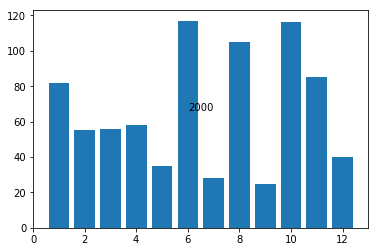

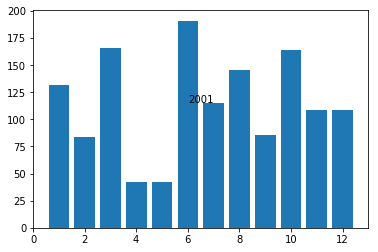

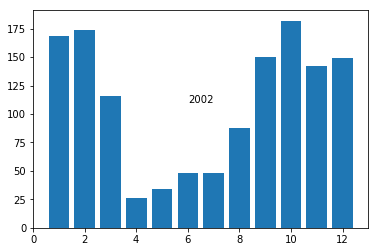

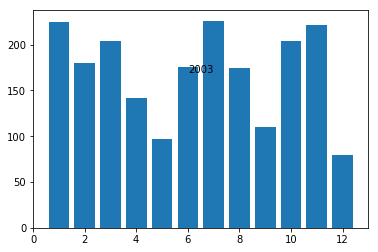

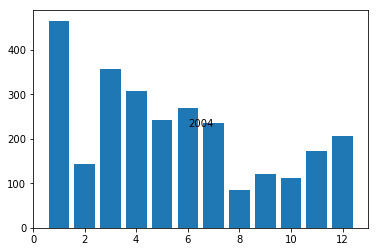

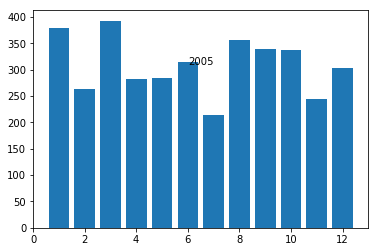

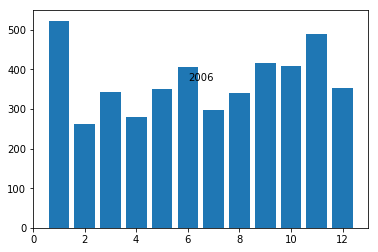

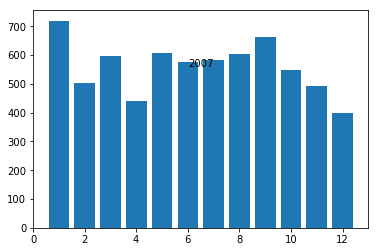

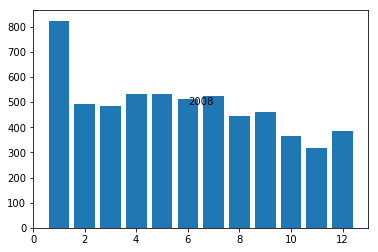

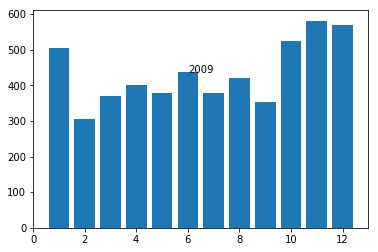

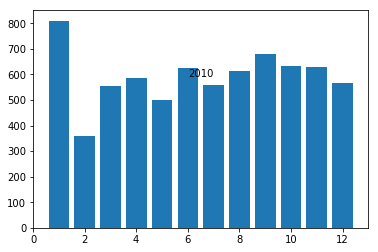

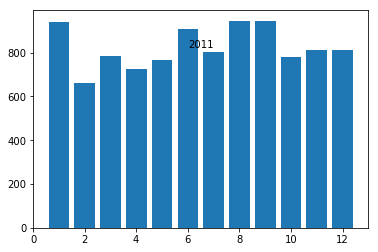

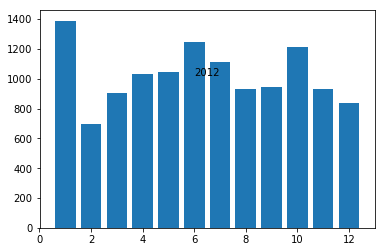

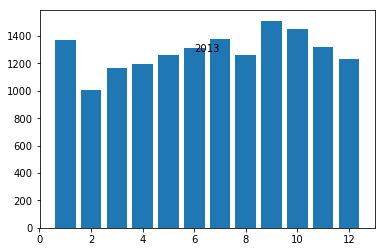

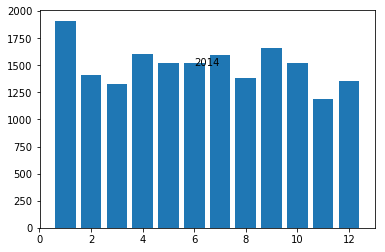

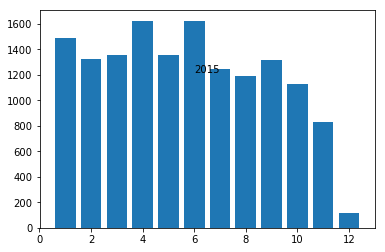

In [8]:
def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=df[(df['funding_year']==year) &(df['company_country_code']=='USA')]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()
monthly_analysis(range(2000,2016))

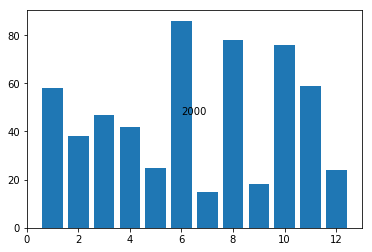

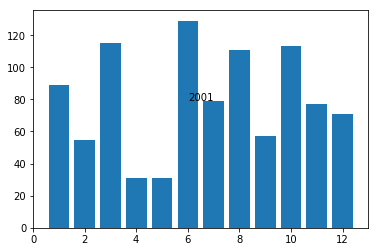

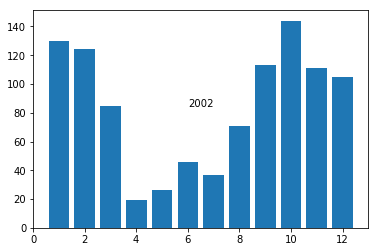

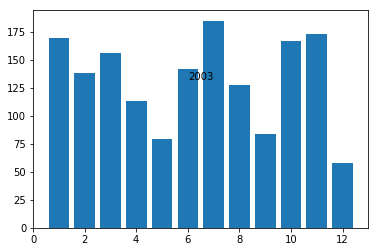

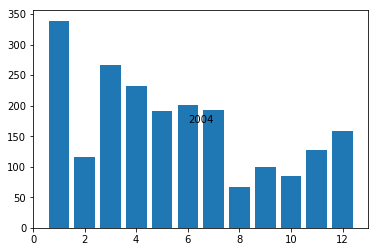

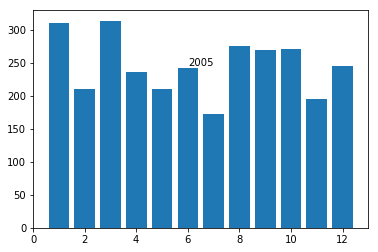

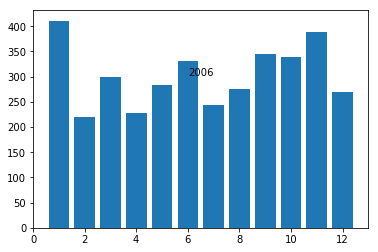

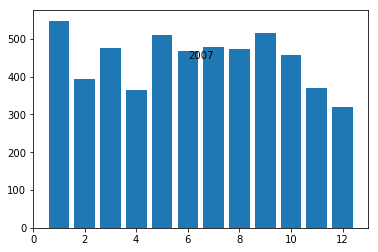

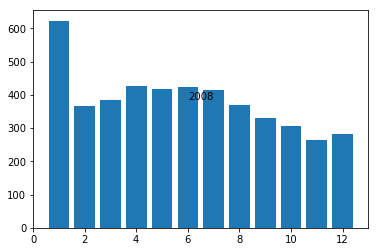

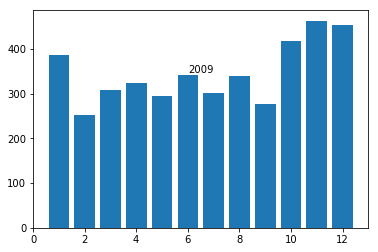

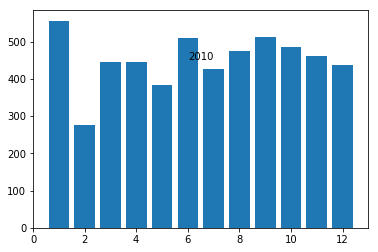

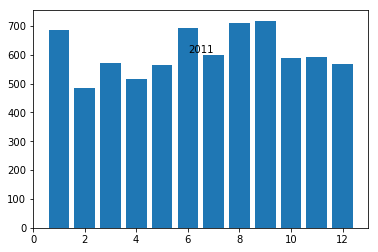

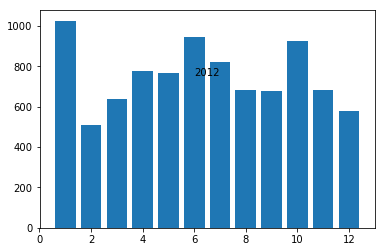

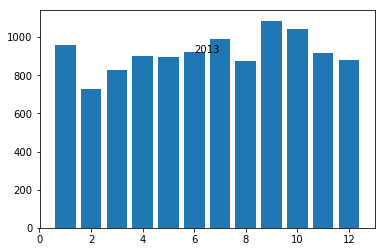

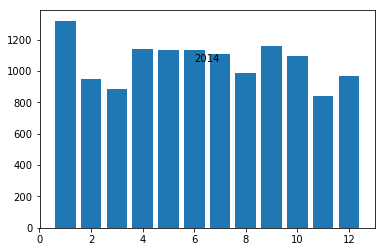

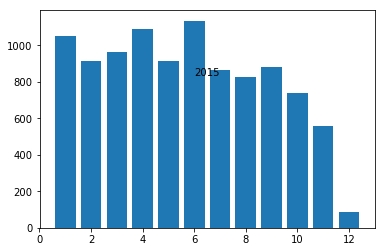

In [9]:
def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=df[(df['funding_year']==year) &(df['company_country_code']=='USA') & (df['investor_country_code']=='USA')]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()
monthly_analysis(range(2000,2016))

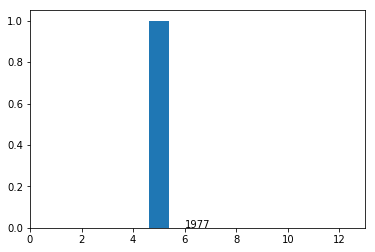

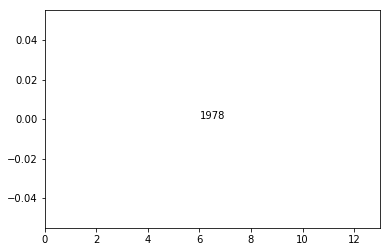

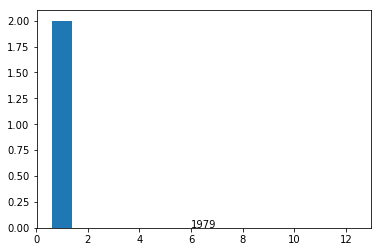

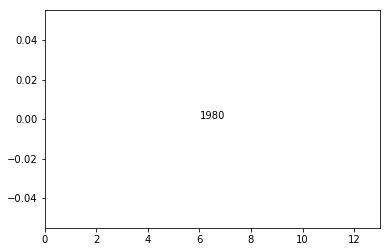

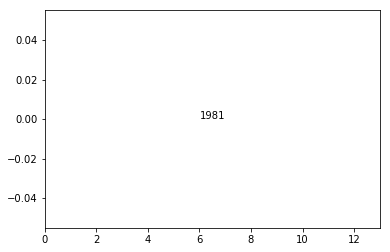

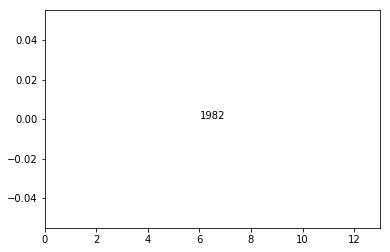

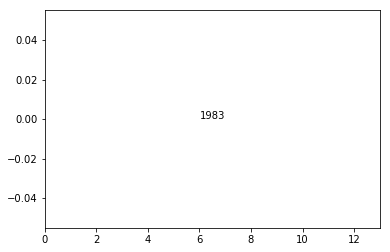

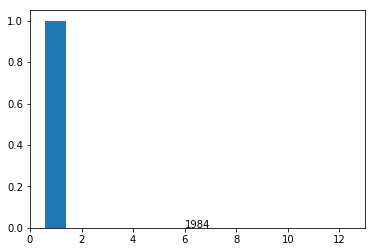

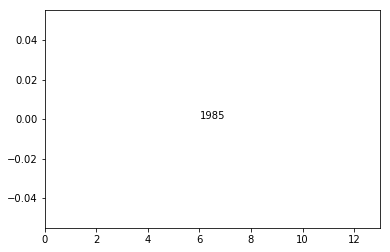

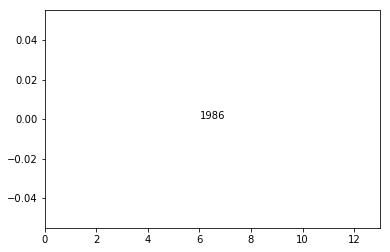

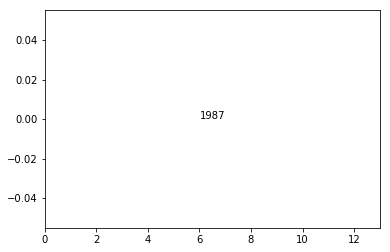

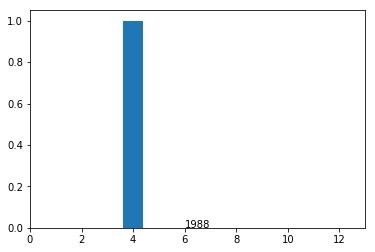

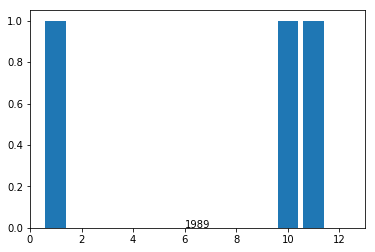

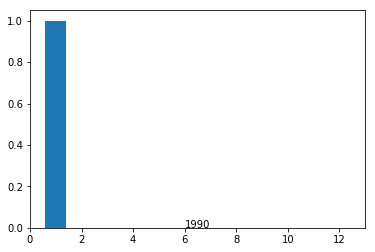

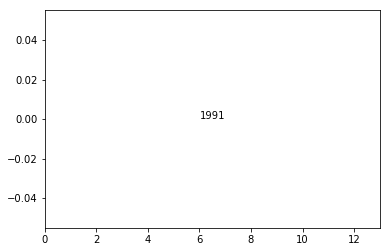

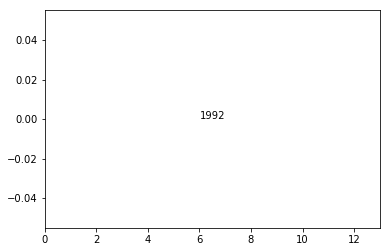

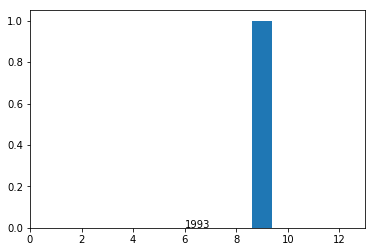

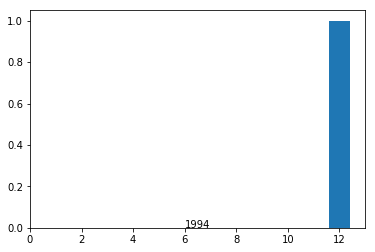

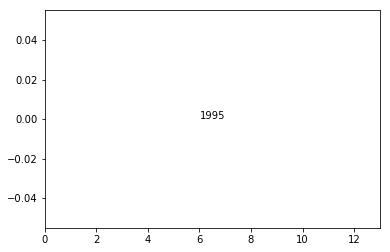

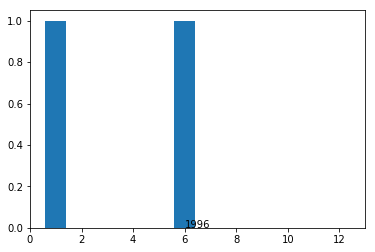

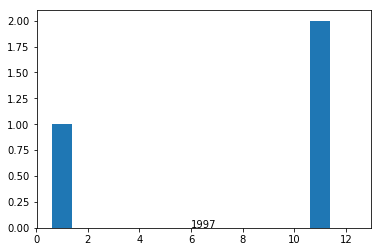

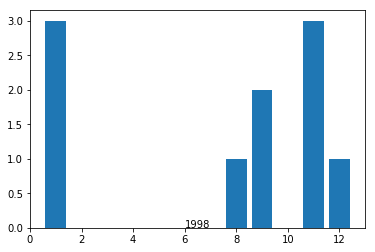

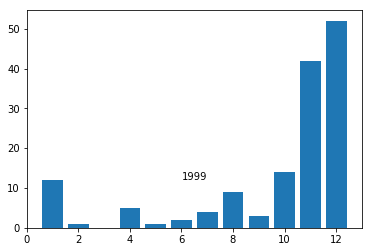

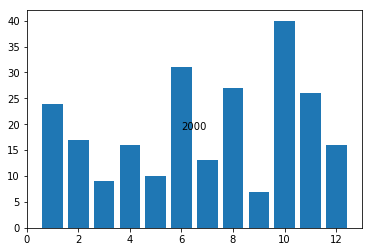

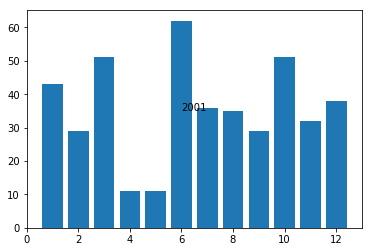

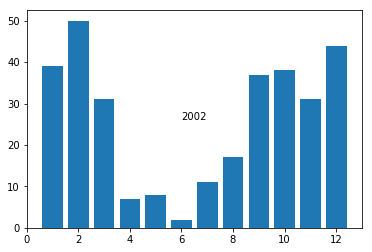

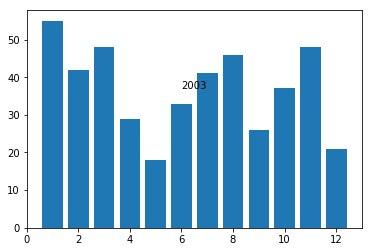

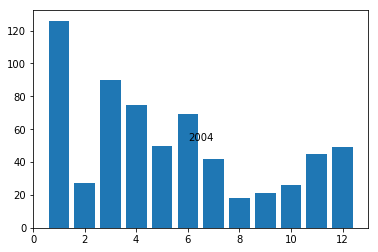

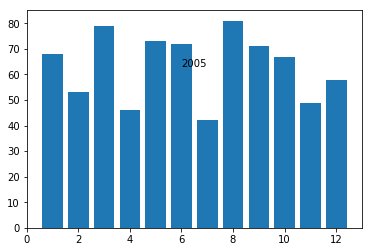

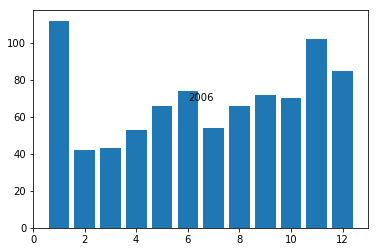

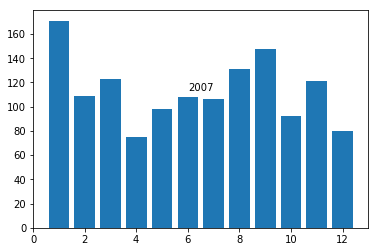

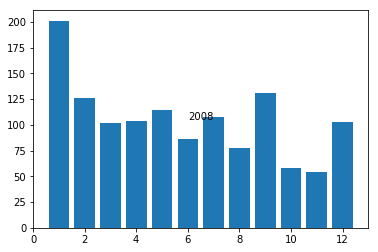

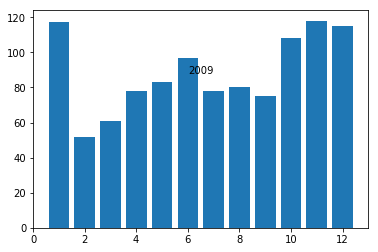

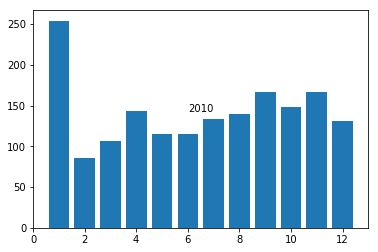

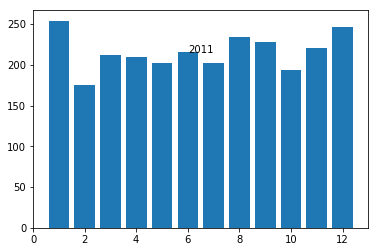

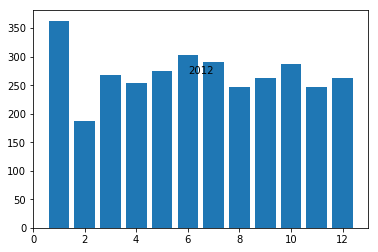

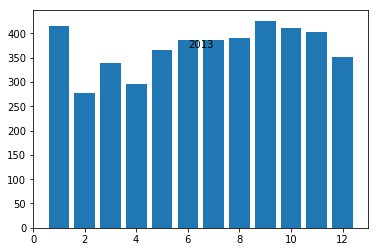

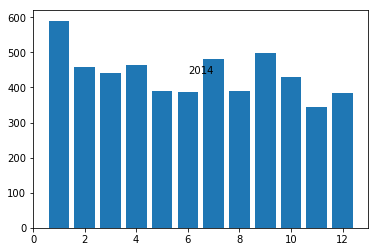

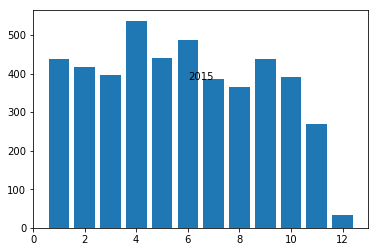

In [13]:
def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=df[(df['funding_year']==year) &(df['company_country_code']=='USA') & (df['investor_country_code']!='USA')]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()
monthly_analysis(range(df['funding_year'].min(),2016))

In [14]:
df['funding_round_type'].unique()

array(['venture', 'undisclosed', 'seed', 'angel', 'debt_financing',
       'convertible_note', 'grant', 'private_equity', 'secondary_market',
       'post_ipo_equity', 'post_ipo_debt', 'equity_crowdfunding',
       'non_equity_assistance', 'product_crowdfunding'], dtype=object)

In [15]:
dfnew=df[df['funding_round_type']=='venture']

In [16]:
# exploring state wise
#checking how many unique states are there
unique_states=df.company_state_code.unique()

In [17]:
nan_entries_state=df['company_state_code'].isnull().sum()
nan_entries_state*100.0/df.shape[0]

7.963972083701459

In [18]:
unique_states

array(['22', 'IL', nan, 'CA', '12', 'OR', 'WA', '25', 'MA', 'A8', 'A9',
       '23', 'WI', 'NY', 'ON', 'AL', '7', 'RI', '36', '2', '9', 'C3',
       '13', '26', '30', '19', '4', 'VA', '48', 'IA', '11', '34', 'DC',
       'NH', 'FL', 'MD', 'GA', '20', '10', '5', '29', 'CO', 'OH', 'P2',
       '1', 'H9', '40', 'NJ', 'TX', 'PA', 'MI', '18', 'TN', 'SC', '42',
       'B4', 'CT', '61', '16', 'UT', 'KY', '32', 'K4', 'B8', 'A6', 'I9',
       '21', 'NS', 'N5', 'G5', 'U8', 'H3', 'NC', 'G7', '27', '3', '56',
       'B7', 'IN', '78', 'BC', 'MN', 'K2', '8', 'KS', '24', 'L9', 'C5',
       'J8', '17', 'QC', 'E4', 'V6', 'Q4', 'MO', 'E9', 'P6', 'V2', 'F8',
       'J9', 'F2', 'A4', 'C9', 'AR', 'HI', 'Q5', 'H8', '65', 'A5', '52',
       'NL', 'I2', 'B9', '97', '60', 'NE', 'J2', 'AZ', '86', 'NM', '14',
       'AB', 'V8', 'G8', 'R3', 'Z1', '53', '15', 'N3', 'DE', 'ME', 'N7',
       '31', 'P8', 'B5', '98', 'A3', '28', 'H2', 'MS', 'K3', 'P9', 'E2',
       'P3', '59', 'Y4', 'K7', 'D9', 'I5', 'LA', '6', '72', 

In [19]:
df.investor_country_code.unique()

array(['CHN', 'DEU', 'HKG', 'USA', nan, 'FRA', 'CHL', 'BHR', 'KOR', 'JPN',
       'RUS', 'AUS', 'SGP', 'AUT', 'SWE', 'IND', 'ESP', 'CAN', 'POL',
       'ITA', 'GBR', 'CHE', 'BEL', 'NLD', 'ISR', 'GHA', 'IRL', 'CZE',
       'BGR', 'JOR', 'HUN', 'MEX', 'FIN', 'SVN', 'BRA', 'NGA', 'PRT',
       'CYM', 'DNK', 'SAU', 'KEN', 'TUR', 'IDN', 'TWN', 'ARE', 'LIE',
       'ZAF', 'MUS', 'SVK', 'KHM', 'THA', 'LUX', 'NOR', 'UKR', 'EST',
       'KWT', 'LVA', 'LTU', 'CRI', 'ARG', 'LBN', 'VEN', 'ISL', 'MYS',
       'URY', 'PHL', 'BMU', 'EGY', 'TAN', 'GRC', 'MLT', 'NZL', 'JEY',
       'CYP', 'COL', 'LKA', 'PAK', 'ROM', 'PSE', 'AZE', 'GEO', 'PER',
       'QAT', 'ARM', 'MMR', 'VNM', 'BAH', 'PRK', 'IRN', 'BLR', 'HRV',
       'MAR', 'TTO', 'TGO', 'BLM', 'BGD', 'GTM', 'MCO', 'GIB'],
      dtype=object)

In [20]:
american_investors=df[df['investor_country_code']=='USA']

In [21]:
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA'].shape[0]
outside_investments=american_investors[american_investors['company_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)

86.06823678392377

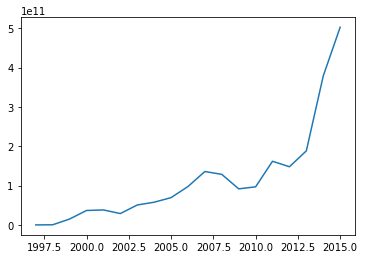

In [22]:
#total investment yearwise
def yearwise_investment(year=2010):
    return df[df['funding_year']==year]['raised_amount_usd'].sum()
investments=[yearwise_investment(year) for year in range(df['funding_year'].min(),df['funding_year'].max()+1)]
plt.plot(range(df['funding_year'].min(),df['funding_year'].max()+1)[20:],investments[20:])

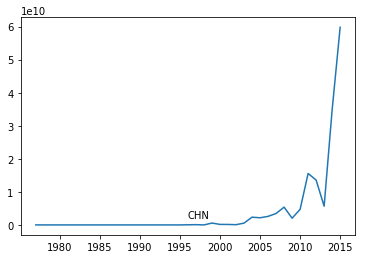

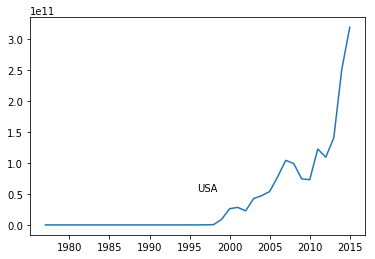

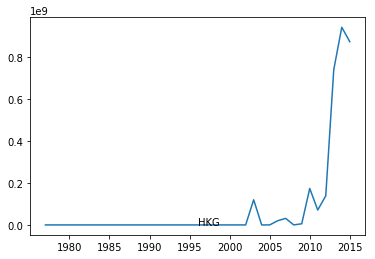

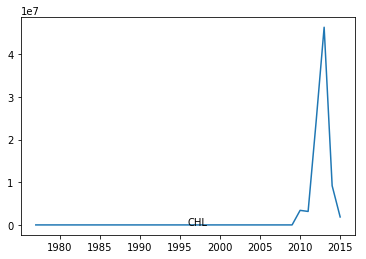

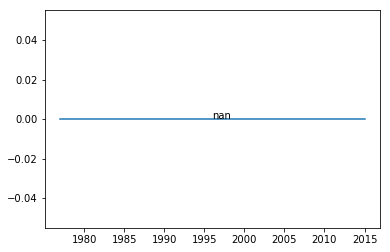

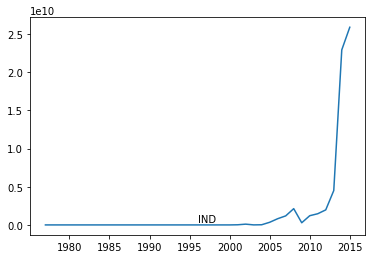

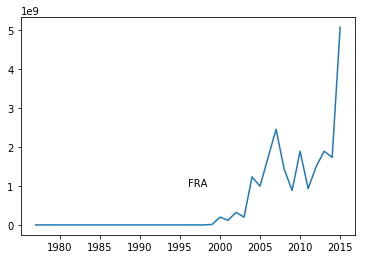

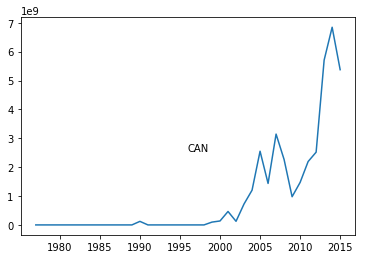

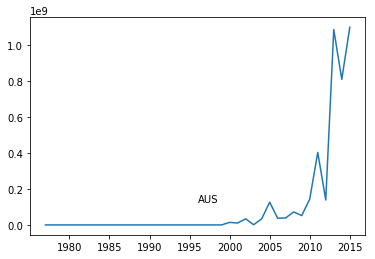

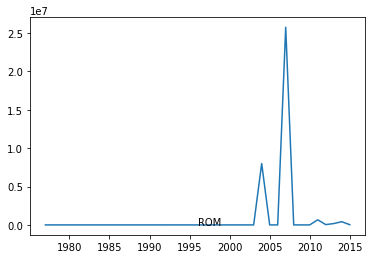

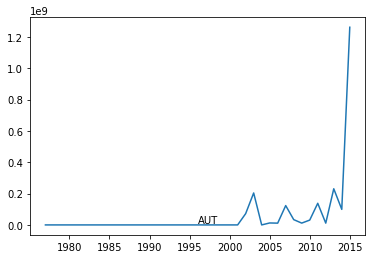

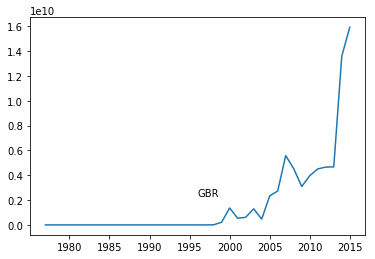

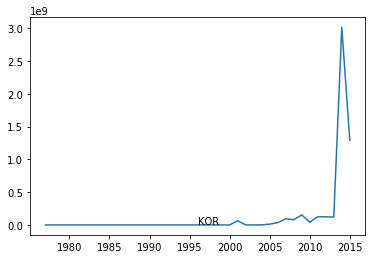

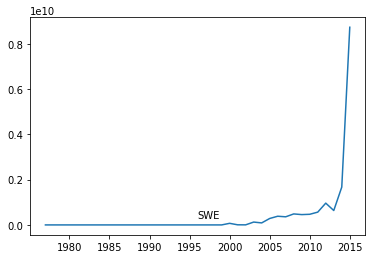

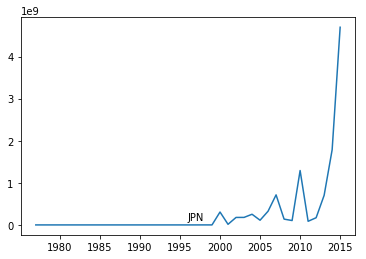

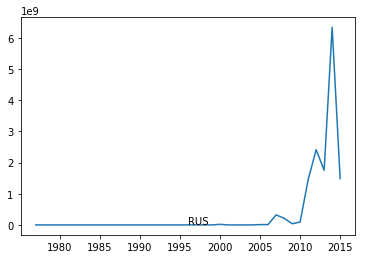

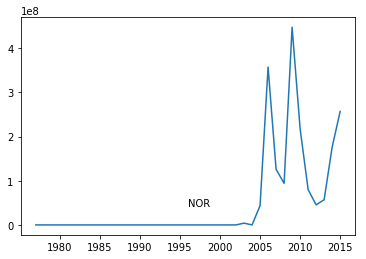

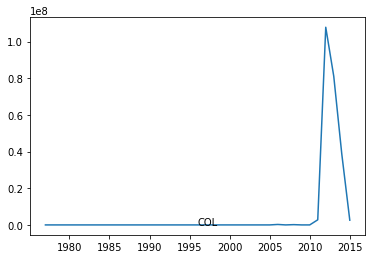

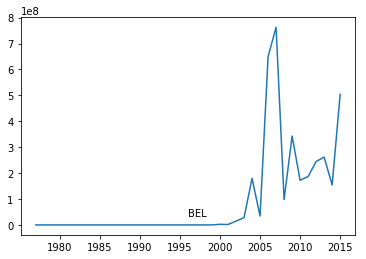

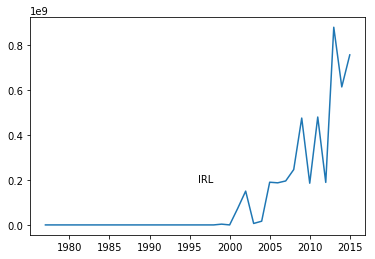

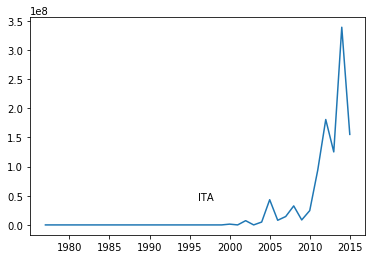

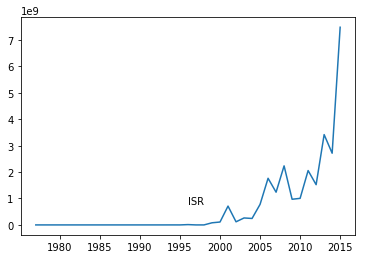

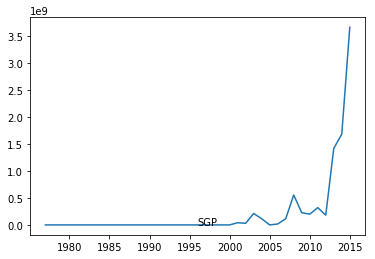

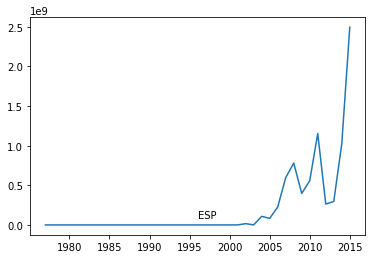

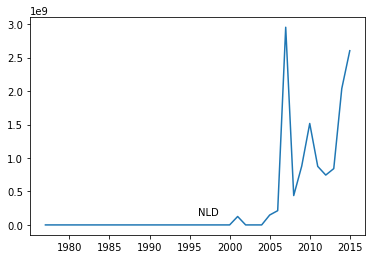

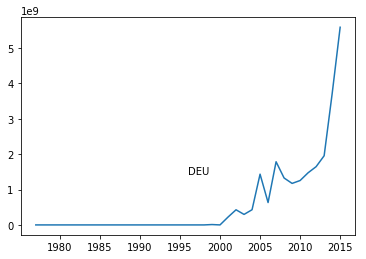

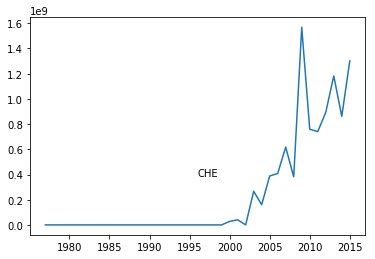

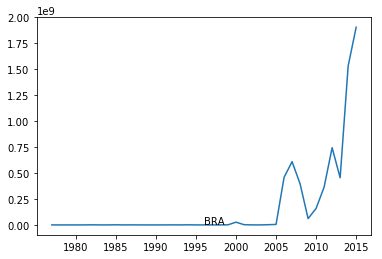

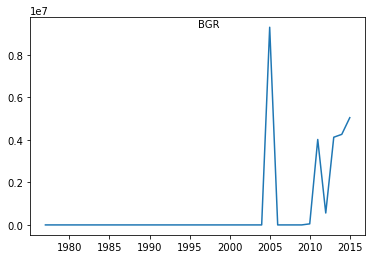

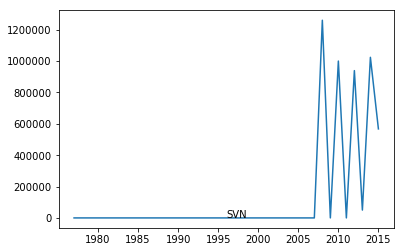

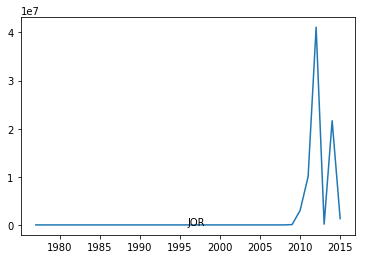

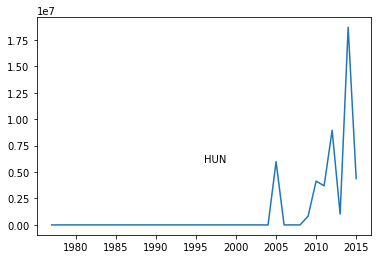

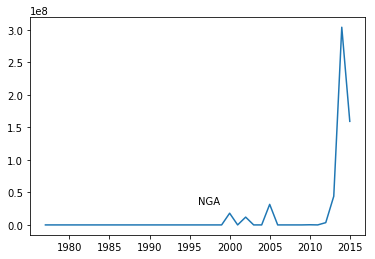

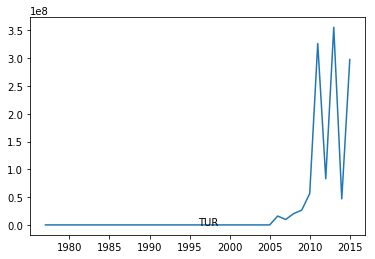

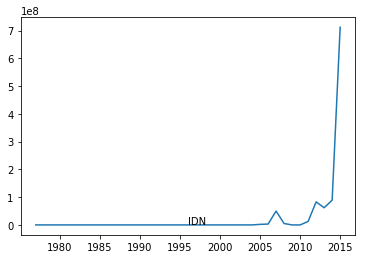

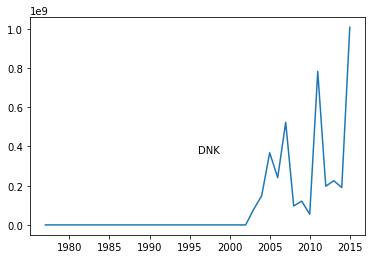

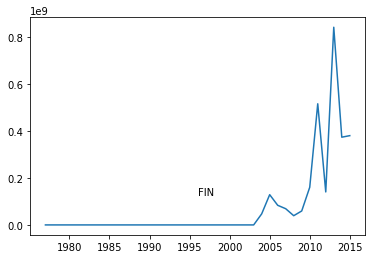

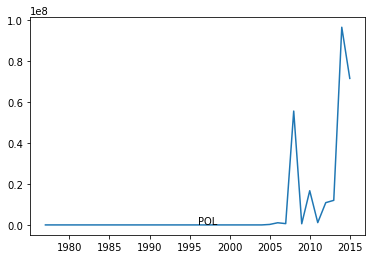

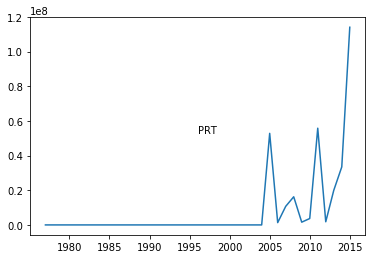

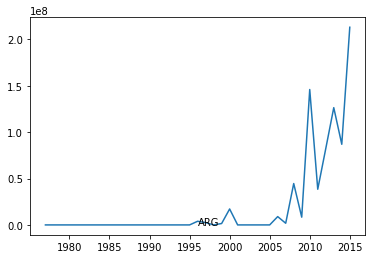

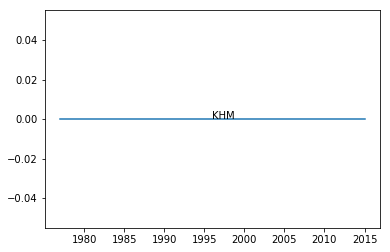

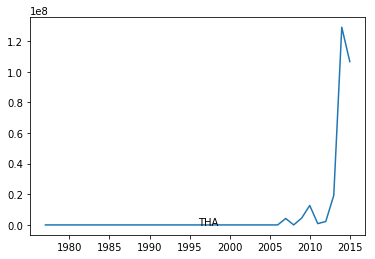

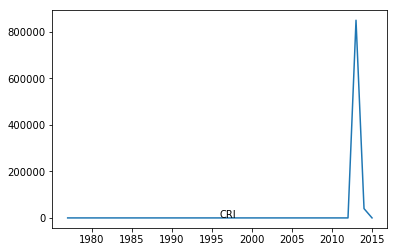

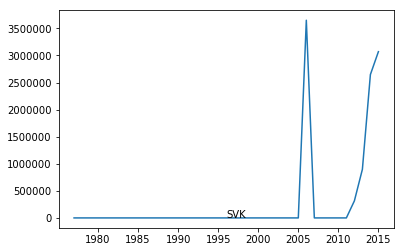

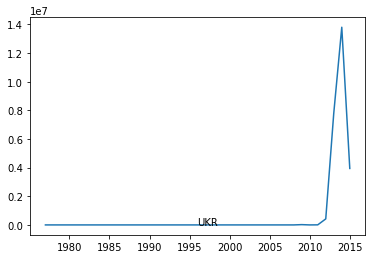

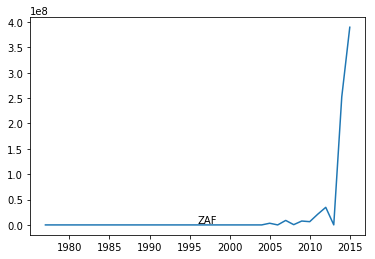

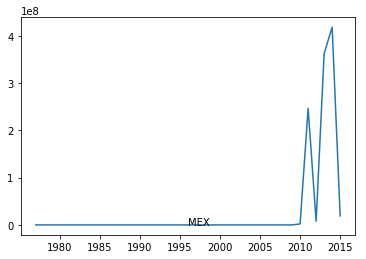

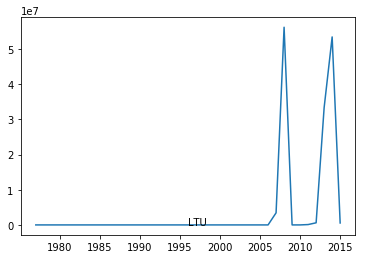

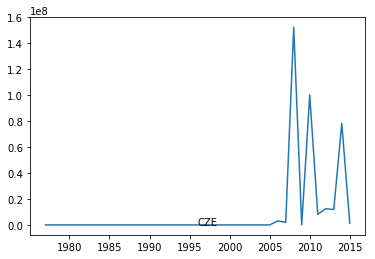

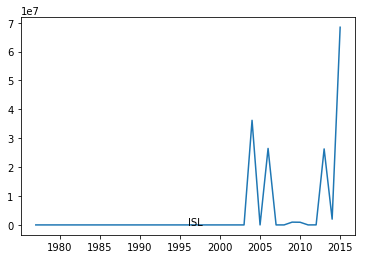

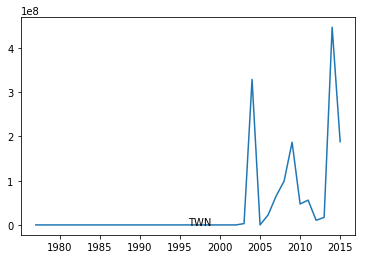

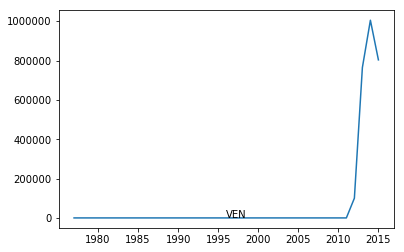

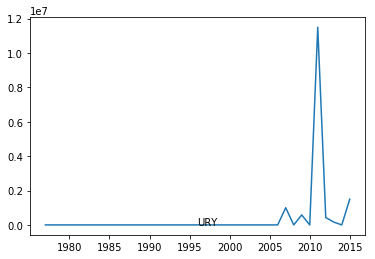

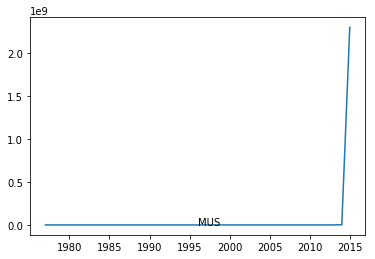

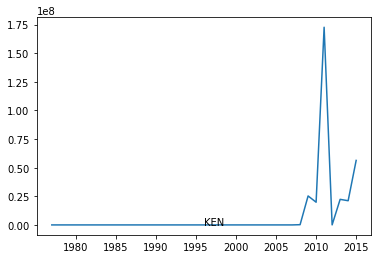

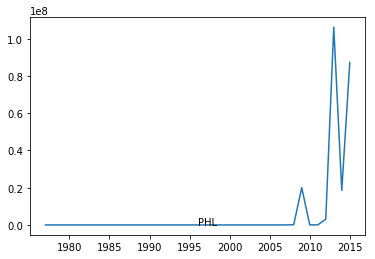

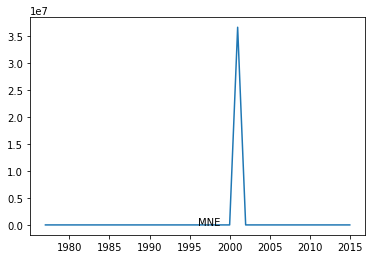

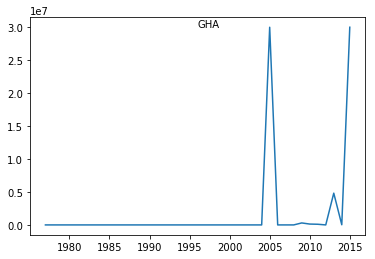

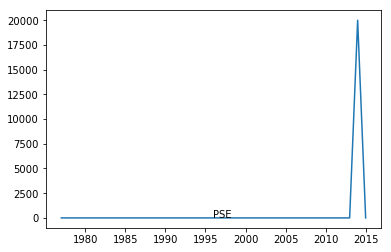

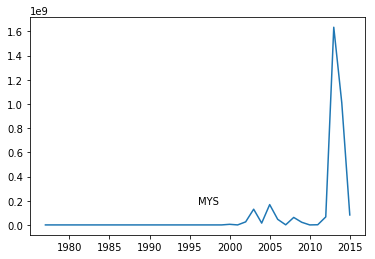

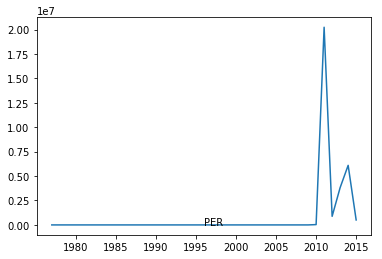

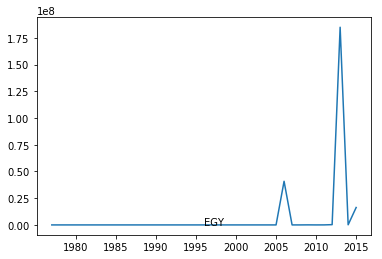

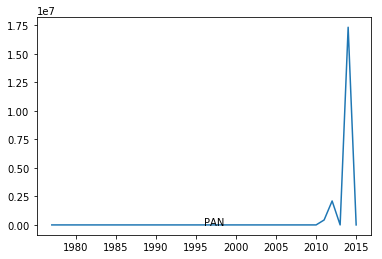

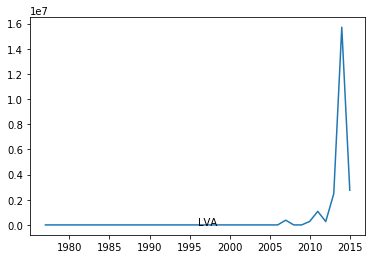

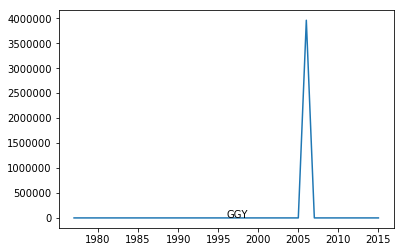

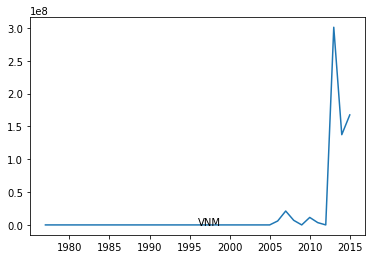

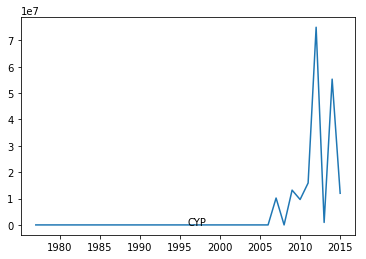

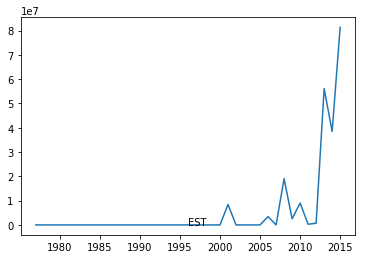

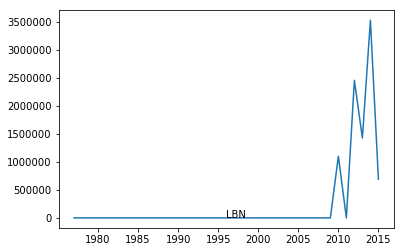

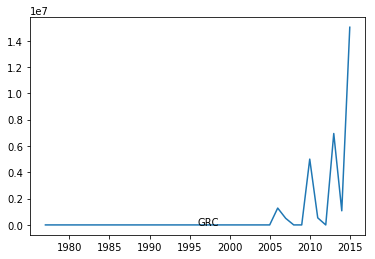

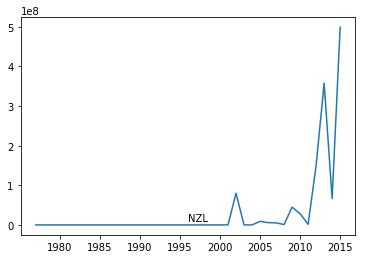

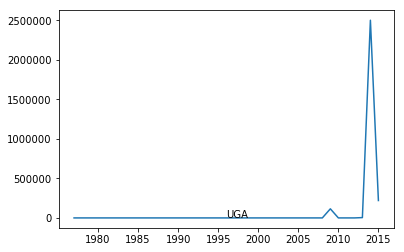

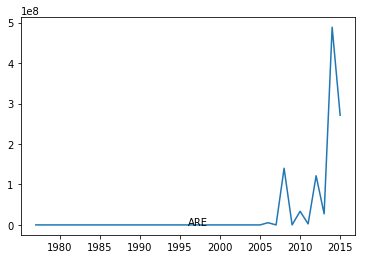

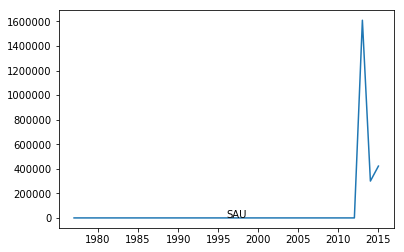

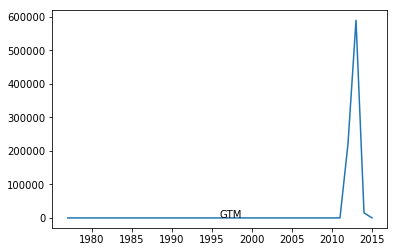

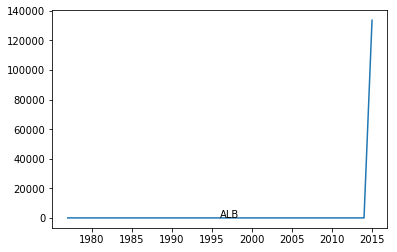

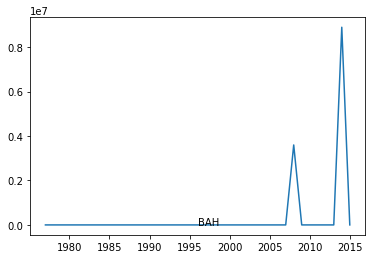

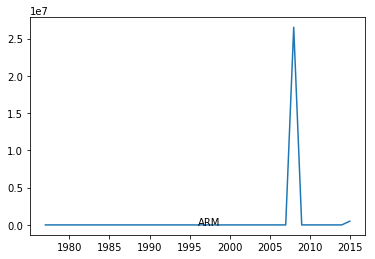

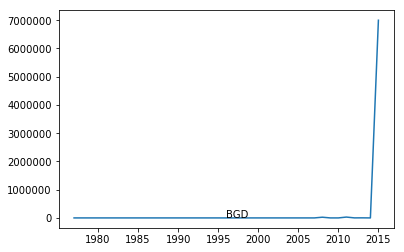

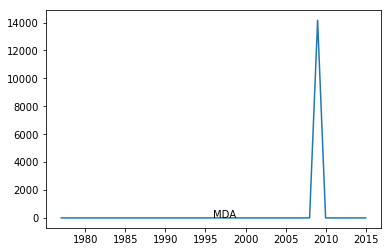

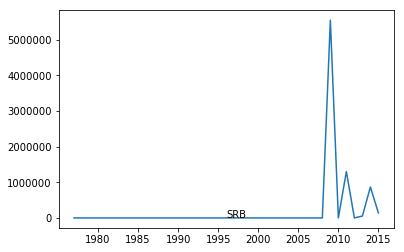

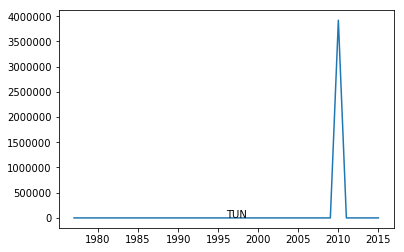

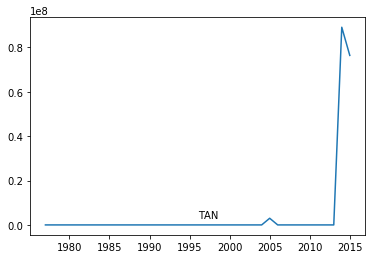

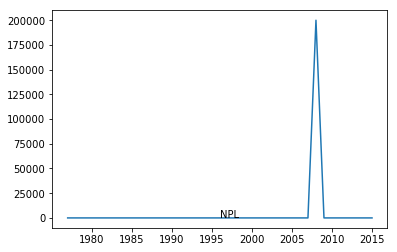

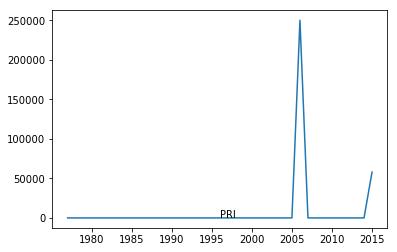

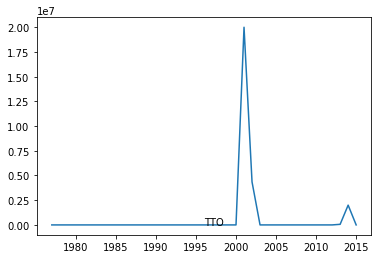

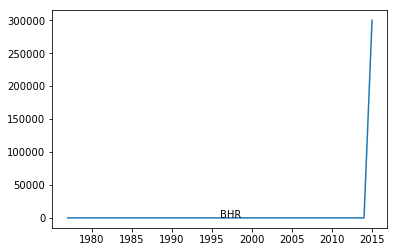

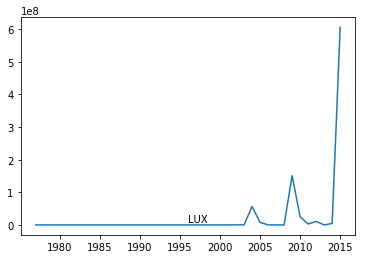

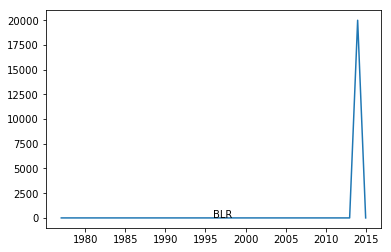

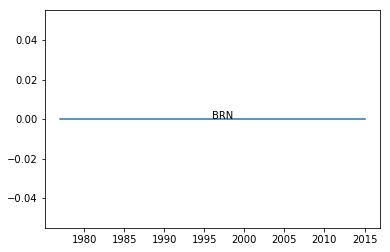

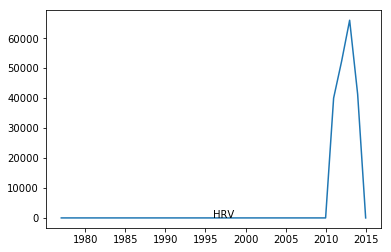

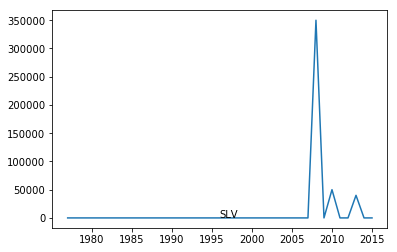

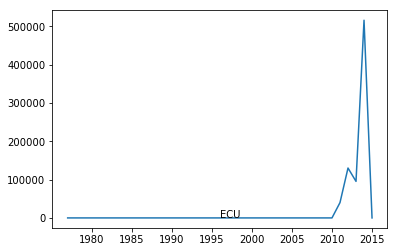

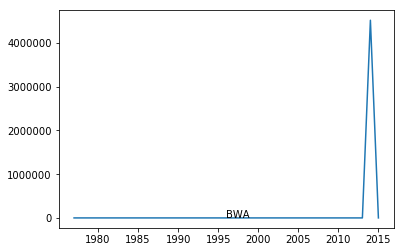

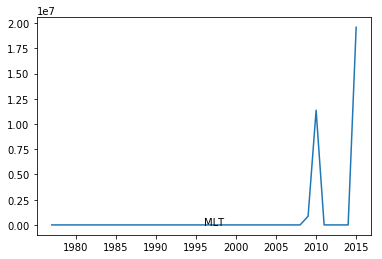

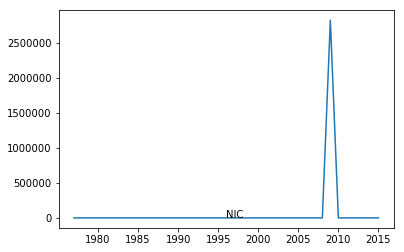

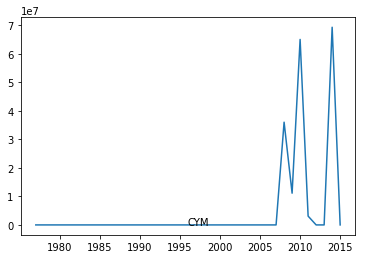

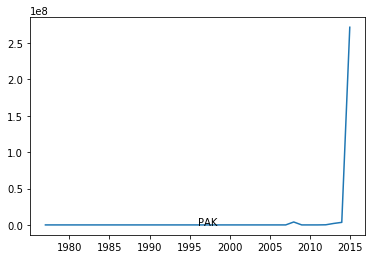

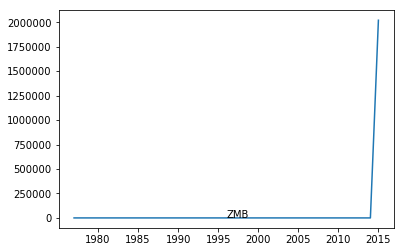

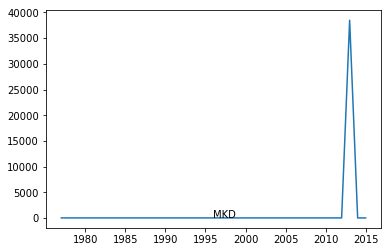

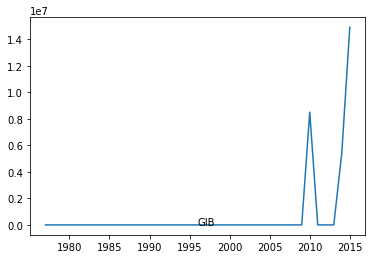

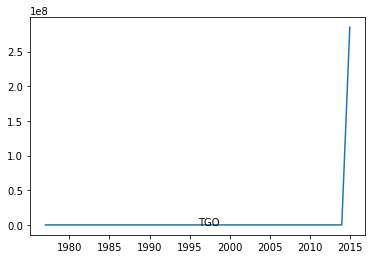

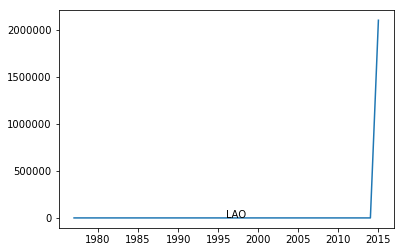

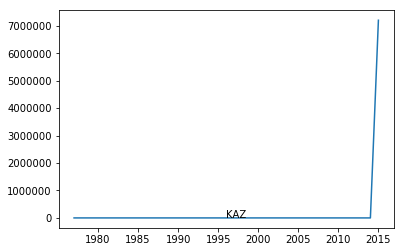

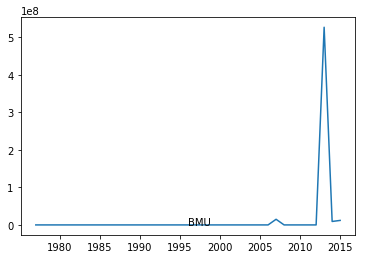

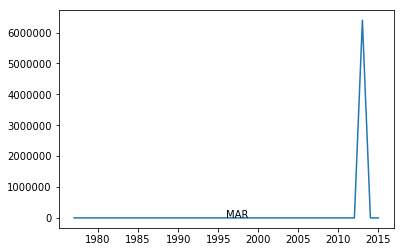

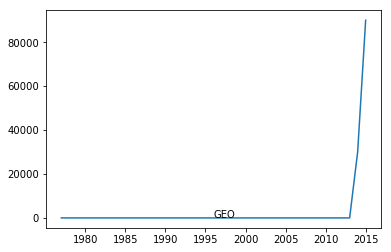

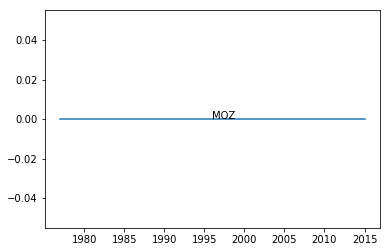

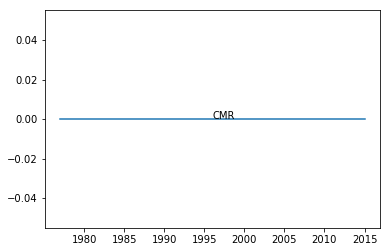

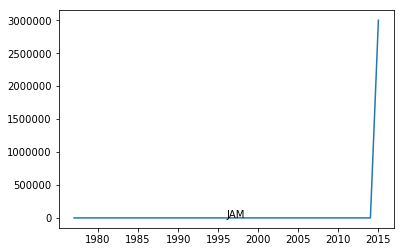

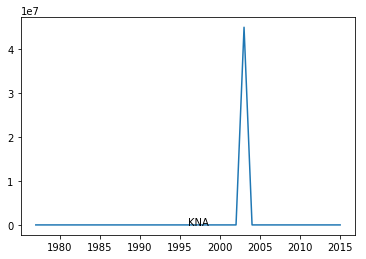

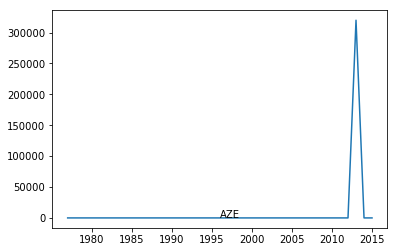

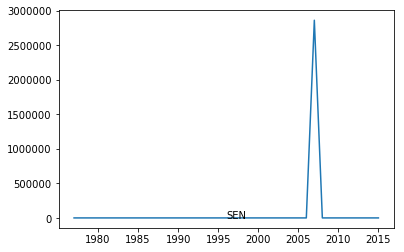

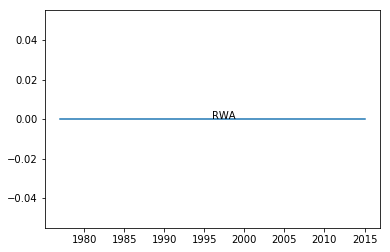

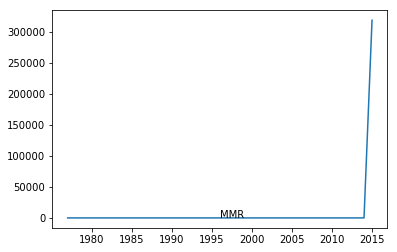

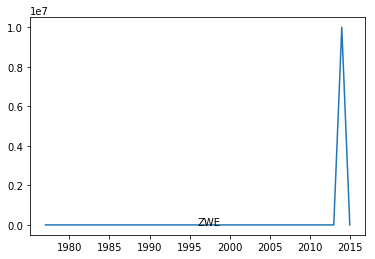

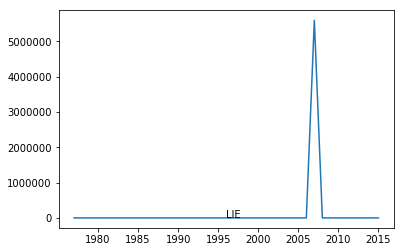

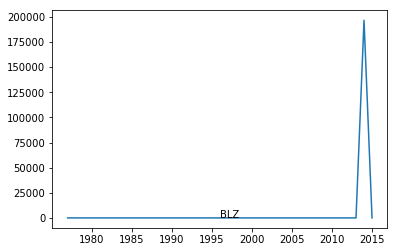

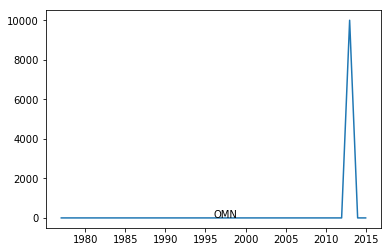

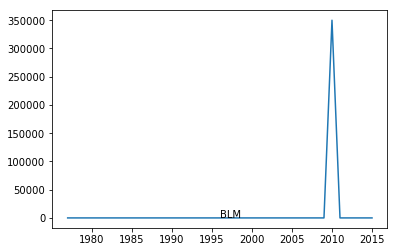

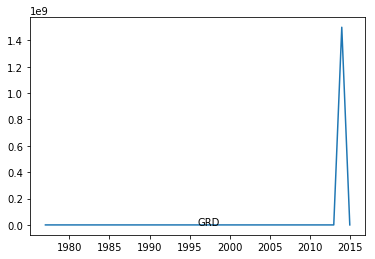

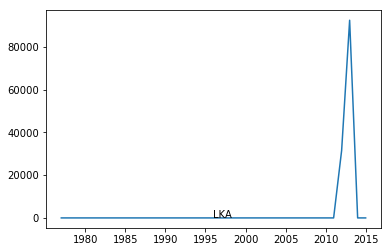

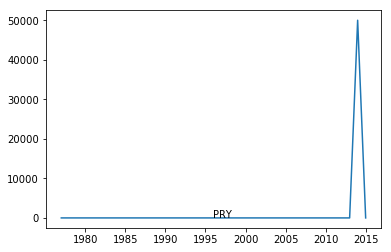

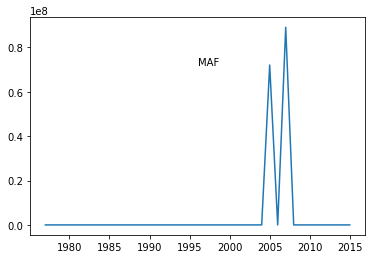

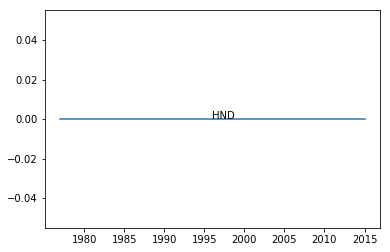

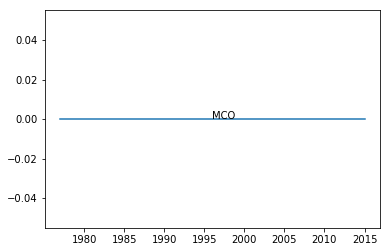

In [23]:
#yearwise trends for each country
def yearwise_country_wise_investment(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),countries_lis=list(df['company_country_code'].unique())):
    for country in countries_lis:
        investments=[]
        for year in year_lis:
             investments.append(df[(df['funding_year']==year) & (df['company_country_code']==country)]['raised_amount_usd'].sum())
        plt.plot(year_lis,investments)
        plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
yearwise_country_wise_investment()

In [24]:
investments[0]#need to account for inflation

250000.0

In [25]:
df=df[pd.notnull(df['company_category_list'])]

In [26]:
#industry wise investment yearwise
category=list(df['company_category_list'].unique())

In [27]:
df.head(10)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_month,funding_year
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,3,2008
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,7,2014
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0,7,2014
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,11,2015
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,5,2013
5,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,11,2015
6,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-01-03,1700000.0,1,2013
7,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0,7,2014
8,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/paxion-capital-partners,Paxion Capital Partners,NaN,NaN,NaN,NaN,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,11,2015
9,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/transamerica,Transamerica,USA,IA,Cedar Rapids,Cedar Rapids,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,11,2015


In [28]:
category

['Curated Web',
 'Software',
 'Games',
 'Analytics',
 'Mobile',
 'E-Commerce',
 'Health and Wellness',
 'Apps|Cable|Distribution|Software',
 'Search',
 'Art|E-Commerce|Marketplaces',
 'Beauty',
 'Local Businesses|Restaurants',
 'Cosmetics|Marketplaces',
 'Games|Media',
 'Hospitality',
 'Education',
 'Health Care|Health Care Information Technology|Hospitals',
 'Advertising|Image Recognition|Sales and Marketing|Social Media|Social Media Advertising',
 'Coffee|Delivery|Subscription Service',
 'E-Commerce|Mobile Commerce|Social Commerce',
 'Batteries|Electronics|Energy',
 'iOS|Mobile|Music',
 'Biotechnology|Technology',
 'Social Travel',
 'Enterprise Software',
 'Health and Wellness|Personal Health',
 'Sports',
 'Audio|Mobile|Music',
 'Health Diagnostics|Medical Devices|Personalization|Pharmaceuticals|Politics|Software|Technology',
 'E-Commerce|SaaS',
 'Internet',
 'Local Search|Software|Web Design',
 'Publishing|Services',
 'Mobile|Service Providers|Software',
 'Manufacturing',
 'Augmente

In [29]:
sum([1 for x in category if 'Software' in x])

4391

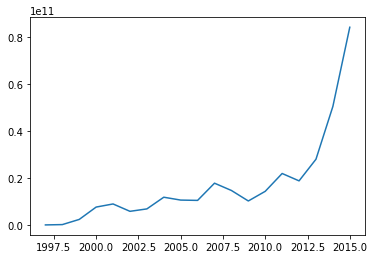

In [30]:
#funding us startups redeived from out of US
def foreign_investments_in_USA(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & (df['investor_country_code']!='USA') &(df['company_country_code']=='USA') ]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
foreign_investments_in_USA(y=20)

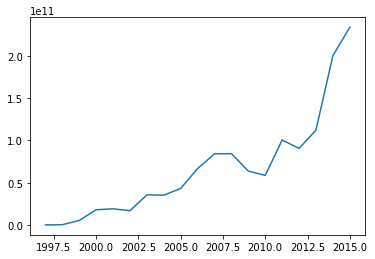

In [31]:
#funding us startups redeived from inside US
def foreign_investments_in_USA(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & (df['investor_country_code']=='USA') &(df['company_country_code']=='USA') ]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
foreign_investments_in_USA(y=20)

In [32]:
#yearwise top 3 countries investments


In [33]:
df['investor_name'].unique().shape[0]

29745

In [34]:
#top investors in USA
# def yearwise_country_wise_investment(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),countries_lis=list(df['company_country_code'].unique())):
#     for country in countries_lis:
#         investments=[]
#         for year in year_lis:
#              investments.append(df[(df['funding_year']==year) & (df['company_country_code']==country)]['raised_amount_usd'].sum())
#         plt.plot(year_lis,investments)
#         plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
#         plt.show()
# yearwise_country_wise_investment()

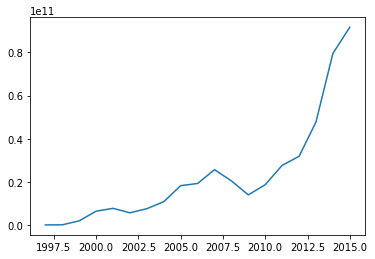

In [35]:
#check for 2010 crash

#funding us startups redeived from out of US
def recession_2008(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & df['company_category_list'].str.contains('Software') ]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
recession_2008(y=20)

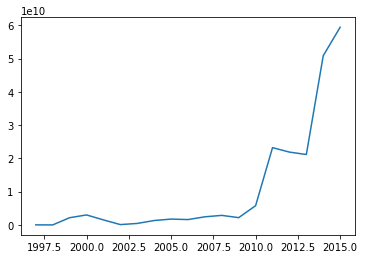

In [36]:
#check other than software

def e_commerce(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & df['company_category_list'].str.contains('e-commerce',case=False) ]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
e_commerce(y=20)

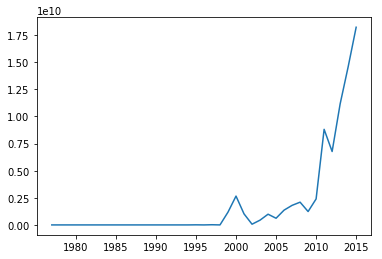

In [37]:
def e_commerce_in_us(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & df['company_category_list'].str.contains('e-commerce',case=False) &(df['company_country_code']=='USA')]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
e_commerce_in_us(y=0)

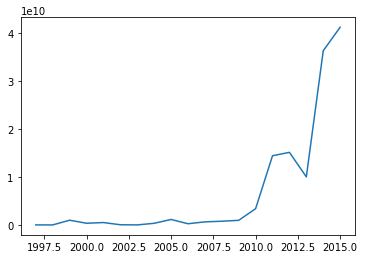

In [38]:
def e_commerce_out_us(year_lis=range(df['funding_year'].min(),df['funding_year'].max()+1),y=0):
        
        investments=[df[(df['funding_year']==year) & df['company_category_list'].str.contains('e-commerce',case=False) &(df['company_country_code']!='USA')]['raised_amount_usd'].sum() for year in year_lis]
        plt.plot(year_lis[y:],investments[y:])
        #plt.text(year_lis[len(year_lis)//2], investments[len(year_lis)//2+len(year_lis)//4],country,)
        plt.show()
e_commerce_out_us(y=20)

In [39]:
df[(df['funding_year']>1997) &(df['funding_year']<2002) & df['company_category_list'].str.contains('e-commerce',case=False) &(df['company_country_code']=='USA')]

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_month,funding_year
8354,/organization/ancestry-com,Ancestry,E-Commerce|Internet,USA,UT,Salt Lake City,Provo,/organization/amerindo-investment-advisors,Amerindo Investment Advisors,NaN,NaN,NaN,NaN,/funding-round/f62a7e39a6dca150898ebfb6c69e729b,venture,B,1999-09-01,33200000.0,9,1999
8355,/organization/ancestry-com,Ancestry,E-Commerce|Internet,USA,UT,Salt Lake City,Provo,/organization/aol,AOL,USA,NY,New York City,New York,/funding-round/f62a7e39a6dca150898ebfb6c69e729b,venture,B,1999-09-01,33200000.0,9,1999
8356,/organization/ancestry-com,Ancestry,E-Commerce|Internet,USA,UT,Salt Lake City,Provo,/organization/compaq,Compaq,USA,CA,SF Bay Area,Palo Alto,/funding-round/f62a7e39a6dca150898ebfb6c69e729b,venture,B,1999-09-01,33200000.0,9,1999
8357,/organization/ancestry-com,Ancestry,E-Commerce|Internet,USA,UT,Salt Lake City,Provo,/organization/pivotal-private-equity,Pivotal Private Equity,USA,AZ,Phoenix,Phoenix,/funding-round/f62a7e39a6dca150898ebfb6c69e729b,venture,B,1999-09-01,33200000.0,9,1999
10909,/organization/archipelago,Archipelago,E-Commerce|Financial Services,USA,IL,Chicago,Chicago,/organization/e-trade,E*Trade Financial Corporation,USA,NY,New York City,New York,/funding-round/75ecb0e057baccb82f22fb9ce22d942c,undisclosed,NaN,1999-01-31,NaN,1,1999
10912,/organization/archipelago,Archipelago,E-Commerce|Financial Services,USA,IL,Chicago,Chicago,/organization/instinet,Instinet,USA,NY,New York City,New York,/funding-round/f0b5a6114b73708ea5bd4566c368a8df,undisclosed,NaN,1999-06-30,NaN,6,1999
10913,/organization/archipelago,Archipelago,E-Commerce|Financial Services,USA,IL,Chicago,Chicago,/organization/merrill-lynch,Merrill Lynch,USA,NY,New York City,New York,/funding-round/1892cec85ca52f4cdbbb684bfbccc1b8,undisclosed,NaN,1999-08-31,NaN,8,1999
20241,/organization/blue-nile,Blue Nile,Consumers|E-Commerce|Retail,USA,WA,Seattle,Seattle,/organization/bessemer-venture-partners,Bessemer Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/061940d4a6f4cc35e0069e1667a9156d,venture,C,2001-07-23,7000000.0,7,2001
20242,/organization/blue-nile,Blue Nile,Consumers|E-Commerce|Retail,USA,WA,Seattle,Seattle,/organization/bessemer-venture-partners,Bessemer Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/dd3c5fe8579dd8f88e3423711a89974d,venture,B,2000-04-17,42000000.0,4,2000
20243,/organization/blue-nile,Blue Nile,Consumers|E-Commerce|Retail,USA,WA,Seattle,Seattle,/organization/integral-capital-partners,Integral Capital Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/061940d4a6f4cc35e0069e1667a9156d,venture,C,2001-07-23,7000000.0,7,2001


In [40]:
df[df['company_name']=='Amazon']

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_month,funding_year
7480,/organization/amazon,Amazon,Consumer Goods|Crowdsourcing|Delivery|E-Commer...,USA,WA,Seattle,Seattle,/organization/kleiner-perkins-caufield-byers,Kleiner Perkins Caufield & Byers,USA,CA,SF Bay Area,Menlo Park,/funding-round/9af93d502a011ed78755d69165f0d646,venture,A,1995-07-01,8000000.0,7,1995


In [52]:
type(df.iloc[0]['raised_amount_usd'])

numpy.float64

In [60]:
countries_list=df['investor_country_code'].unique()

In [61]:
countries_list

array(['CHN', 'DEU', 'HKG', 'USA', nan, 'FRA', 'CHL', 'BHR', 'KOR', 'JPN',
       'RUS', 'AUS', 'SGP', 'AUT', 'SWE', 'IND', 'ESP', 'CAN', 'POL',
       'ITA', 'GBR', 'CHE', 'BEL', 'NLD', 'ISR', 'GHA', 'IRL', 'BGR',
       'JOR', 'HUN', 'MEX', 'FIN', 'SVN', 'BRA', 'NGA', 'PRT', 'CYM',
       'DNK', 'SAU', 'KEN', 'TUR', 'IDN', 'TWN', 'ARE', 'LIE', 'ZAF',
       'MUS', 'THA', 'SVK', 'LUX', 'NOR', 'UKR', 'EST', 'KWT', 'LVA',
       'LTU', 'CZE', 'CRI', 'ARG', 'LBN', 'VEN', 'ISL', 'MYS', 'URY',
       'PHL', 'BMU', 'EGY', 'TAN', 'GRC', 'KHM', 'MLT', 'NZL', 'JEY',
       'CYP', 'COL', 'LKA', 'PAK', 'ROM', 'PSE', 'AZE', 'GEO', 'PER',
       'QAT', 'ARM', 'MMR', 'VNM', 'BAH', 'PRK', 'IRN', 'BLR', 'HRV',
       'MAR', 'TTO', 'TGO', 'BLM', 'BGD', 'GTM', 'MCO', 'GIB'],
      dtype=object)

In [63]:
year=2014
df_year=df[df['funding_year']==year]
investment=[df_year[df_year['investor_country_code']==country]['raised_amount_usd'].sum() for country in countries_list]

In [77]:
new_c=['USA','CHN','GBR','HKG','SGP','RUS','CHE','CAN','DEU']
year=2014
df_year=df[df['funding_year']==year]
df_year=df_year[pd.notnull(df_year['investor_country_code'])]
investment=[df_year[df_year['investor_country_code']==country]['raised_amount_usd'].sum() for country in new_c]
investment.append(df_year[~df_year['investor_country_code'].isin(new_c)]['raised_amount_usd'].sum())

In [84]:
df_year['investor_country_code']!='USA'

503       False
511       False
514       False
524       False
731       False
733       False
738       False
819        True
820        True
821       False
2027      False
2694      False
2721      False
2826      False
2829      False
2843      False
2848      False
2857      False
5055      False
5057      False
5063      False
5066      False
5067       True
5072      False
5074      False
5534       True
5535      False
5536      False
5537      False
6079       True
          ...  
161735    False
162426    False
162431    False
162433    False
163092    False
163443    False
163532    False
163533    False
163534    False
164289    False
164290     True
164291    False
164633     True
164634    False
164635    False
164637    False
164718    False
164780    False
164781    False
164782    False
164813     True
164884     True
164885     True
165111     True
165617     True
165707    False
165989     True
166359    False
166364    False
168172     True
Name: investor_country_c

In [145]:
#investment in us by us
investment=[]
for year in range(1990,2015):
    #year=2005
    df_year=df[df['funding_year']==year]
    df_year=df_year[pd.notnull(df_year['investor_country_code'])]
    investment.append([df_year[df_year['investor_country_code']=='USA']['raised_amount_usd'].sum(), df_year[df_year['investor_country_code']!='USA']['raised_amount_usd'].sum()])

plot(fig, filename='donut')

/home/sai/anaconda3/lib/python3.5/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `donut` didn't end with .html. Adding .html to the end of your file.



'file:///home/sai/ece143/crunchbase-data-master/donut.html'

In [40]:
import geoplotlib
from geoplotlib.utils import read_csv

In [146]:
pinv=[x[0]/(sum(x)+0.000000000001) for x in investment]

In [148]:
pinv

[1.0,
 0.0,
 0.9990059642147118,
 0.0,
 0.9009009009009009,
 1.0,
 0.3632330514349092,
 0.6968876860622463,
 0.7517792049991321,
 0.8481230780586662,
 0.8637929991256532,
 0.8143796580711937,
 0.8127910517592826,
 0.86518687217957,
 0.8182934730135507,
 0.7817104662256855,
 0.8125633098696996,
 0.7768798854577394,
 0.7872816750339261,
 0.7980130924542836,
 0.7663584570610822,
 0.7645798819890851,
 0.7667689716653033,
 0.7752080081350745,
 0.7418479092099174]

In [122]:
xd=[i*1.0/(len(investment)//2+1) for i in range(len(investment)//2+2)]
xd

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]

In [134]:
xd=xd+xd

In [131]:
len(xd),len(yd)

(9, 15)

In [127]:
def fn(i,n):
    return [0,0.5] if i<(n)//2+1 else [0.5,1]

In [130]:
yd=[fn(1,len(investment)) for i in range(len(investment))]
yd

[[0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5],
 [0, 0.5]]

In [137]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
fig = {
  "data": [
    {
      "values": investment[i],
      "labels": ['USA','Rest Of World'],
      "domain": {"x": [xd[i],xd[i+1]],'y':yd[i]},
      "name": "Countrywise investments",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    } for i in range(len(investment))],
  "layout": {
        "title":"Global Emissions 1990-2011",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": '',
                "x": 0.20,
                "y": 0.5
            } for _ in range(len(investments))]
        
    }
}
plot(fig, filename='donut')

/home/sai/anaconda3/lib/python3.5/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `donut` didn't end with .html. Adding .html to the end of your file.



'file:///home/sai/ece143/crunchbase-data-master/donut.html'

In [98]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
fig = {
  "data": [
    {
      "values": investment,
      "labels": new_c+['REST OF WORLD'],
      "domain": {"x": [0.5, 1]
                'y':[0.5,1]},
      "name": "Countrywise investments",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [27, 11, 25, 8, 1, 3, 25],
      "labels": [
        "US",
        "China",
        "European Union",
        "Russian Federation",
        "Brazil",
        "India",
        "Rest of World"
      ],
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [, 1]},
      "name": "CO2 Emissions",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Global Emissions 1990-2011",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "COUNTRIES",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "CO2",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
plot(fig, filename='donut')

SyntaxError: invalid syntax (<ipython-input-98-fc59cce708b6>, line 11)

In [ ]:
#find investors

In [36]:
#region wise categories

In [39]:
df['funding_round_type'].unique()

array(['venture', 'undisclosed', 'seed', 'angel', 'debt_financing',
       'convertible_note', 'grant', 'private_equity', 'secondary_market',
       'post_ipo_equity', 'post_ipo_debt', 'equity_crowdfunding',
       'non_equity_assistance', 'product_crowdfunding'], dtype=object)

In [40]:
# which beture type invested in which region

In [ ]:
#check which month is good for starting/looking for investments